# **Projeto Final - Grupo 01 - Finanças/Contabilidade**

Escola: SoulCode Academy

Curso: Bootcamp Analista de Dados - Martech - AD2

Professores: Franciane Rodrigues, Jonathas Carneiro e Douglas Ribeiro

Alunos:

- Gabriel Henrique Moraes Silva;
- Renata Reis;
- Leandro de Oliveira;
- Ériv Jhomic;
- Victor Gaspar;
- Jonatan Dourado;

## Legenda de Dados:

* **Receita Líquida** - Corresponde às vendas brutas após a dedução dos impostos sobre vendas, descontos, abatimentos e devoluções;

* **Liquidez Corrente** - Indicador financeiro utilizado para analisar o potencial de uma companhia em arcar com o pagamento de suas dívidas e compromissos financeiros no curto prazo;

* **Margem de contribuição** - Quanto sobra do preço da venda, depois que você subtrai os custos e as despesas variáveis relacionados a essa venda;

* **EBITDA** - Lucro de uma empresa antes de juros, impostos, depreciação e amortização é uma medida da lucratividade de uma empresa apenas do negócio operacional, portanto, antes de quaisquer efeitos de endividamento, pagamentos exigidos pelo estado e custos necessários para manter sua base de ativos;

* **ROI** - Relação entre a quantidade de dinheiro ganho como resultado de um investimento e a quantidade de dinheiro investido;

* **Taxa de Endividamento** - Quanto uma empresa ou indivíduo está endividado em relação ao seu patrimônio líquido.;

* **Dívida Líquida** - soma das obrigações financeiras de uma empresa menos o valor que ela tem em caixa;


# Instalação e Importações

## Instalando os requisitos necessários

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz

!pip install -q findspark

## Importando as ferramentas e criando o ambiente virtul para o spark

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

## Criando a sessão clusterizada do PySpark

In [3]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
from pyspark.sql.functions import regexp_replace
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Para deixar a visualição das tabelas mais amigável
spark

## Importando as ferramentas e criando o ambiente virtul para utilização do Pandas

In [ ]:
# Instalação dos pacotes
!pip install gcsfs
!pip install pandera
!python -m pip install pymongo

In [5]:
# Abertura de bibliotecas
import os
import pandas as pd
import numpy as np
import pandera as pa
from google.cloud import storage
import matplotlib.pyplot as plt
from pymongo import MongoClient

In [6]:
# Para ignonar avisos
import warnings
warnings.filterwarnings("ignore")

# Analise de Dados DRE TRANSPOSTO

## **Extração**

In [7]:
# Permite Acesso a GCP
serviceAccount = '/content/projeto-taurus-d40d4228e598.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [8]:
# Selecionando o arquivo da Bucket
client = storage.Client()
bucket = client.get_bucket('taurus_armas')
bucket.blob('taurus_armas/Taurus_csv/dre_transposto.csv')
# URI da gsutil
path = 'gs://taurus_armas/Taurus_csv/Taurus_csv_bruto/dre_transposto.csv'

## Transformação

In [9]:
# Armazenando arquivo csv
df = pd.read_csv(path)

In [10]:
df.head()

,Trimestre,Receita Bruta de Vendas e/ou Serviços,Deduções da Receita Bruta,Receita Líquida de Vendas e/ou Serviços,Custo de Bens e/ou Serviços Vendidos,Resultado Bruto,Despesas Com Vendas,Despesas Gerais e Administrativas,Perdas pela Não Recuperabilidade de Ativos,Outras Receitas Operacionais,...,Patrimônio Líquido,Capital Social Realizado,Reservas de Capital,Reservas de Reavaliação,Reservas de Lucros,Lucros/Prejuízos Acumulados,Ajustes de Avaliação Patrimonial,Ajustes Acumulados de Conversão,Outros Resultados Abrangentes,Adiantamento para Futuro Aumento Capital.1
0,31/03/2023,NaN,NaN,453.233,-276.849,176.384,-61.361,-55.385,-3.758,3.385,...,1.047.748,367.936,-19.445,0.0,464.256,35.536,44.395,0.0,155.070,0.0
1,31/12/2022,NaN,NaN,597.894,-363.670,234.224,-62.943,-44.570,-1.724,11.244,...,1.024.231,367.936,-21.355,0.0,464.256,0,44.535,0.0,168.859,0.0
2,30/09/2022,NaN,NaN,639.972,-346.043,293.929,-64.278,-59.553,-534.000,5.740,...,1.083.619,366.256,-21.573,0.0,133.555,373.585,44.688,0.0,187.108,0.0
3,30/06/2022,NaN,NaN,625.586,-327.856,297.730,-60.107,-45.173,-20.000,6.965,...,926.833,330.730,-23.526,0.0,133.477,270.345,44.867,0.0,170.940,0.0
4,31/03/2022,NaN,NaN,676.569,-342.028,334.541,-65.388,-52.625,-526.000,28.591,...,885.921,313.226,-26.521,0.0,259.293,169.816,45.046,0.0,125.061,0.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 56 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Trimestre                                                       42 non-null     object 
 1   Receita Bruta de Vendas e/ou Serviços                           0 non-null      float64
 2   Deduções da Receita Bruta                                       0 non-null      float64
 3   Receita Líquida de Vendas e/ou Serviços                         42 non-null     float64
 4   Custo de Bens e/ou Serviços Vendidos                            42 non-null     float64
 5   Resultado Bruto                                                 42 non-null     float64
 6   Despesas Com Vendas                                             42 non-null     float64
 7   Despesas Gerais e Administrativas                      

In [12]:
df.isnull().sum()

Trimestre                                                          0
Receita Bruta de Vendas e/ou Serviços                             42
Deduções da Receita Bruta                                         42
Receita Líquida de Vendas e/ou Serviços                            0
Custo de Bens e/ou Serviços Vendidos                               0
Resultado Bruto                                                    0
Despesas Com Vendas                                                0
Despesas Gerais e Administrativas                                  0
Perdas pela Não Recuperabilidade de Ativos                         0
Outras Receitas Operacionais                                       0
Outras Despesas Operacionais                                       0
Resultado da Equivalência Patrimonial                              0
Financeiras                                                        0
Receitas Financeiras                                               0
Despesas Financeiras              

In [13]:
# Verificando a quantidade de linhas existentes no dataframe
df.shape[0]

42

In [14]:
# Há 42 valores nulos (mesmo número de linhas do df) em cada coluna com valor nulo
# Portanto, todas essas colunas serão excluídas
df.dropna(axis=1, inplace=True)

In [ ]:
# Total de valores nulos por atributo
df.isnull().sum()

In [ ]:
# Verificando a presença de linhas duplicadas
df.duplicated()

In [17]:
# Definindo as colunas a serem verificadas
colunas_verificar = ['Empréstimos e Financiamentos', 'Empréstimos e Financiamentos.1',
                     'Passivos com Partes Relacionadas', 'Passivos com Partes Relacionadas.1',
                     'Outros', 'Outros.1',
                     'Provisões', 'Provisões.1',
                     'Adiantamento para Futuro Aumento Capital', 'Adiantamento para Futuro Aumento Capital.1']

# Verificando se as colunas com nomes repetidos são iguais
i = 0
while i < len(colunas_verificar):
  if (df[colunas_verificar[i]] == df[colunas_verificar[i+1]]).all():
    print(f"A coluna '{colunas_verificar[i]}' é IGUAL a coluna '{colunas_verificar[i+1]}'.")
  else:
    print(f"A coluna '{colunas_verificar[i]}' é DIFERENTE da coluna '{colunas_verificar[i+1]}'.")
  i += 2


A coluna 'Empréstimos e Financiamentos' é DIFERENTE da coluna 'Empréstimos e Financiamentos.1'.
A coluna 'Passivos com Partes Relacionadas' é DIFERENTE da coluna 'Passivos com Partes Relacionadas.1'.
A coluna 'Outros' é DIFERENTE da coluna 'Outros.1'.
A coluna 'Provisões' é DIFERENTE da coluna 'Provisões.1'.
A coluna 'Adiantamento para Futuro Aumento Capital' é IGUAL a coluna 'Adiantamento para Futuro Aumento Capital.1'.


In [18]:
# Salvando os nomes de todas as colunas em uma lista
colunas = list(df.columns)

In [19]:
# Fazendo backup do df
df_backup1 = df

In [20]:
# Excluindo as colunas que possuem todos os valores iguas a 0
for coluna in colunas:
  if df[coluna].eq(0).all():
    df.drop(coluna, axis=1, inplace=True)
df.shape

(42, 43)

In [21]:
df.columns

Index(['Trimestre', 'Receita Líquida de Vendas e/ou Serviços',
       'Custo de Bens e/ou Serviços Vendidos', 'Resultado Bruto',
       'Despesas Com Vendas', 'Despesas Gerais e Administrativas',
       'Perdas pela Não Recuperabilidade de Ativos ',
       'Outras Receitas Operacionais', 'Outras Despesas Operacionais',
       'Resultado da Equivalência Patrimonial', 'Financeiras',
       'Receitas Financeiras', 'Despesas Financeiras',
       'Resultado Antes Tributação/Participações',
       'Provisão para IR e Contribuição Social', 'IR Diferido',
       'Part. de Acionistas Não Controladores', 'Lucro/Prejuízo do Período',
       'Passivo Total', 'Passivo Circulante',
       'Obrigações Sociais e Trabalhistas', 'Fornecedores',
       'Obrigações Fiscais', 'Empréstimos e Financiamentos',
       'Dividendos e JCP a Pagar', 'Outros', 'Provisões',
       'Passivos sobre Ativos Não-Correntes a Venda e Descontinuados',
       'Passivo Não Circulante', 'Empréstimos e Financiamentos.1',
      

In [22]:
# Dentre as colunas a serem excluidas
# houve erro no drop da 'Perdas pela Não Recuperabilidade de Ativos '

df.drop(['Resultado da Equivalência Patrimonial',
         'Resultado Antes Tributação/Participações',
         'Financeiras',
         'Provisões',
         'Outros',
         'Passivos sobre Ativos Não-Correntes a Venda e Descontinuados',
         'Passivo Não Circulante',
         'Empréstimos e Financiamentos',
         'Dividendos e JCP a Pagar',
         'Tributos Diferidos',
         'Part. de Acionistas Não Controladores',
         'Passivo Total',
         'Passivo Circulante',
         'Lucros/Prejuízos Acumulados',
         'Patrimônio Líquido',
         'Outros.1',
         'Empréstimos e Financiamentos.1',
         'Passivos com Partes Relacionadas.1',
         'Provisões.1',
         'Lucros e Receitas a Apropriar',
         'Ajustes Acumulados de Conversão',
         'Outros Resultados Abrangentes',
         'Ajustes de Avaliação Patrimonial',
         'IR Diferido',
         'Provisão para IR e Contribuição Social',
         'Obrigações Sociais e Trabalhistas',
         'Obrigações Fiscais',
         'Lucro/Prejuízo do Período',
         'Capital Social Realizado',
         'Reservas de Capital',
         'Reservas de Lucros',
         'Fornecedores'
         ],axis=1, inplace=True)

In [23]:
df.columns

Index(['Trimestre', 'Receita Líquida de Vendas e/ou Serviços',
       'Custo de Bens e/ou Serviços Vendidos', 'Resultado Bruto',
       'Despesas Com Vendas', 'Despesas Gerais e Administrativas',
       'Perdas pela Não Recuperabilidade de Ativos ',
       'Outras Receitas Operacionais', 'Outras Despesas Operacionais',
       'Receitas Financeiras', 'Despesas Financeiras'],
      dtype='object')

In [24]:
# Renomear
df.rename(columns={
    'Trimestre': 'data_trimestre',
    'Custo de Bens e/ou Serviços Vendidos': 'custo_bens_vendidos',
    'Resultado Bruto': 'receita_bruta',
    'Despesas Com Vendas': 'despesas_vendas',
    'Despesas Gerais e Administrativas': 'despesas_gerais',
    'Outras Receitas Operacionais': 'receitas_outras',
    'Outras Despesas Operacionais': 'despesas_outras',
    'Receitas Financeiras': 'receitas_financeiras',
    'Despesas Financeiras': 'despesas_financeiras',
    'Receita Líquida de Vendas e/ou Serviços': 'Receita_liquida_serviços'
}, inplace=True)

In [ ]:
df.head()

In [26]:
# Analisando a Tipagem dos dados
df.dtypes

data_trimestre                                  object
Receita_liquida_serviços                       float64
custo_bens_vendidos                            float64
receita_bruta                                  float64
despesas_vendas                                float64
despesas_gerais                                float64
Perdas pela Não Recuperabilidade de Ativos     float64
receitas_outras                                float64
despesas_outras                                float64
receitas_financeiras                           float64
despesas_financeiras                           float64
dtype: object

In [27]:
# A coluna 'data_trimestre' está como object
# Visualizando essa coluna
df['data_trimestre']

0     31/03/2023
1     31/12/2022
2     30/09/2022
3     30/06/2022
4     31/03/2022
5     31/12/2021
6     30/09/2021
7     30/06/2021
8     31/03/2021
9     31/12/2020
10    30/09/2020
11    30/06/2020
12    31/03/2020
13    31/12/2019
14    30/09/2019
15    30/06/2019
16    31/03/2019
17    31/12/2018
18    30/09/2018
19    30/06/2018
20    31/03/2018
21    31/12/2017
22    30/09/2017
23    30/06/2017
24    31/03/2017
25    31/12/2016
26    30/09/2016
27    30/06/2016
28    31/03/2016
29    31/12/2015
30    30/09/2015
31    30/06/2015
32    31/03/2015
33    31/12/2014
34    30/09/2014
35    30/06/2014
36    31/03/2014
37    31/12/2013
38    30/09/2013
39    30/06/2013
40    31/03/2013
41    31/12/2012
Name: data_trimestre, dtype: object

In [ ]:
df['data_trimestre'] = pd.to_datetime(df['data_trimestre'])
df['data_trimestre']

In [ ]:
# Vizualizando o df final
df.sample(10)

In [30]:
df.dtypes

data_trimestre                                 datetime64[ns]
Receita_liquida_serviços                              float64
custo_bens_vendidos                                   float64
receita_bruta                                         float64
despesas_vendas                                       float64
despesas_gerais                                       float64
Perdas pela Não Recuperabilidade de Ativos            float64
receitas_outras                                       float64
despesas_outras                                       float64
receitas_financeiras                                  float64
despesas_financeiras                                  float64
dtype: object

In [ ]:
#Convertendo o data_trimestre para o formato DD/MM/AAAA

df['data_trimestre'].dt.strftime('%d/%m/%Y')

##Pyspark

In [32]:
'''
Criando um dataframe PySpark a partir de um dataframe pandas
'''
df_dre_py = spark.createDataFrame(df)

In [33]:
df_dre_py.printSchema()

root
 |-- data_trimestre: timestamp (nullable = true)
 |-- Receita_liquida_serviços: double (nullable = true)
 |-- custo_bens_vendidos: double (nullable = true)
 |-- receita_bruta: double (nullable = true)
 |-- despesas_vendas: double (nullable = true)
 |-- despesas_gerais: double (nullable = true)
 |-- Perdas pela Não Recuperabilidade de Ativos : double (nullable = true)
 |-- receitas_outras: double (nullable = true)
 |-- despesas_outras: double (nullable = true)
 |-- receitas_financeiras: double (nullable = true)
 |-- despesas_financeiras: double (nullable = true)



In [34]:
df_dre_py.show()

+-------------------+------------------------+-------------------+-------------+---------------+---------------+-------------------------------------------+---------------+---------------+--------------------+--------------------+
|     data_trimestre|Receita_liquida_serviços|custo_bens_vendidos|receita_bruta|despesas_vendas|despesas_gerais|Perdas pela Não Recuperabilidade de Ativos |receitas_outras|despesas_outras|receitas_financeiras|despesas_financeiras|
+-------------------+------------------------+-------------------+-------------+---------------+---------------+-------------------------------------------+---------------+---------------+--------------------+--------------------+
|2023-03-31 00:00:00|                 453.233|           -276.849|      176.384|        -61.361|        -55.385|                                     -3.758|          3.385|         -2.453|              42.754|             -42.862|
|2022-12-31 00:00:00|                 597.894|            -363.67|      234.

In [35]:
# Excluindo a coluna  Perdas pela Não Recuperabilidade de Ativos e criando a versão com trimestre
index_to_drop = 6
df_dre_py_2 = df_dre_py.drop(df_dre_py.columns[index_to_drop])
df_dre_py_2.show()

+-------------------+------------------------+-------------------+-------------+---------------+---------------+---------------+---------------+--------------------+--------------------+
|     data_trimestre|Receita_liquida_serviços|custo_bens_vendidos|receita_bruta|despesas_vendas|despesas_gerais|receitas_outras|despesas_outras|receitas_financeiras|despesas_financeiras|
+-------------------+------------------------+-------------------+-------------+---------------+---------------+---------------+---------------+--------------------+--------------------+
|2023-03-31 00:00:00|                 453.233|           -276.849|      176.384|        -61.361|        -55.385|          3.385|         -2.453|              42.754|             -42.862|
|2022-12-31 00:00:00|                 597.894|            -363.67|      234.224|        -62.943|         -44.57|         11.244|         21.857|             101.842|             -84.836|
|2022-09-30 00:00:00|                 639.972|           -346.043

In [36]:
# Criando a versão sem o trimestre para tratamento descritivo
index_to_drop = 0
df_dre_py_atualizado = df_dre_py_2.drop(df_dre_py.columns[index_to_drop])

df_dre_py_atualizado.show()

+------------------------+-------------------+-------------+---------------+---------------+---------------+---------------+--------------------+--------------------+
|Receita_liquida_serviços|custo_bens_vendidos|receita_bruta|despesas_vendas|despesas_gerais|receitas_outras|despesas_outras|receitas_financeiras|despesas_financeiras|
+------------------------+-------------------+-------------+---------------+---------------+---------------+---------------+--------------------+--------------------+
|                 453.233|           -276.849|      176.384|        -61.361|        -55.385|          3.385|         -2.453|              42.754|             -42.862|
|                 597.894|            -363.67|      234.224|        -62.943|         -44.57|         11.244|         21.857|             101.842|             -84.836|
|                 639.972|           -346.043|      293.929|        -64.278|        -59.553|           5.74|         -1.269|              49.533|             -70.146

## Analises

##Analise Descritiva

In [37]:
describe_dre = df_dre_py_atualizado.describe()
describe_dre.show()

+-------+------------------------+-------------------+------------------+------------------+------------------+------------------+------------------+--------------------+--------------------+
|summary|Receita_liquida_serviços|custo_bens_vendidos|     receita_bruta|   despesas_vendas|   despesas_gerais|   receitas_outras|   despesas_outras|receitas_financeiras|despesas_financeiras|
+-------+------------------------+-------------------+------------------+------------------+------------------+------------------+------------------+--------------------+--------------------+
|  count|                      42|                 42|                42|                42|                42|                42|                42|                  42|                  42|
|   mean|      318.70878571428574|-198.30126190476196|120.40752380952381|-36.61459523809524|-35.91983333333333| 41.99011904761905|-90.75916666666664|   56.59080952380953|  -61.17419047619048|
| stddev|      192.66521566513876|   88.

In [38]:
# convertendo desvio padrão em linha

sd = list(describe_dre.collect()[2])
print(sd)

sd.remove('stddev')
print(sd)
#list(...) converte o objeto Row em uma lista de valores.


['stddev', '192.66521566513876', '88.1326242479604', '107.86076392552103', '15.617466249417161', '12.926118248397106', '141.59556885260497', '228.76627622765798', '111.46490606447769', '43.51105860904681']
['192.66521566513876', '88.1326242479604', '107.86076392552103', '15.617466249417161', '12.926118248397106', '141.59556885260497', '228.76627622765798', '111.46490606447769', '43.51105860904681']


In [39]:
#Variância

# Gerar a nova lista 'var' com valores elevados ao quadrado
var = [float(value) ** 2 for value in sd]

# Imprimir a nova lista 'var'
print(sd)
print(var)

['192.66521566513876', '88.1326242479604', '107.86076392552103', '15.617466249417161', '12.926118248397106', '141.59556885260497', '228.76627622765798', '111.46490606447769', '43.51105860904681']
[37119.88532729443, 7767.359456832176, 11633.944394596978, 243.90525205168413, 167.08453297154466, 20049.305118692795, 52334.009139069116, 12424.425283962835, 1893.2122212799068]


In [40]:
#Insiro o valor do summary para identificação e bater o número de linhas da describe
var.insert(0, 'Variância')

df_var = spark.createDataFrame([var])
df_var.show()

+---------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|       _1|               _2|               _3|                _4|                _5|                _6|                _7|                _8|                _9|               _10|
+---------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+
|Variância|37119.88532729443|7767.359456832176|11633.944394596978|243.90525205168413|167.08453297154466|20049.305118692795|52334.009139069116|12424.425283962835|1893.2122212799068|
+---------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+



In [41]:
#Adicionando o dataframe Variância ao describe_dre
describe_dre = describe_dre.union(df_var)
describe_dre.show()

+---------+------------------------+-------------------+------------------+------------------+------------------+------------------+------------------+--------------------+--------------------+
|  summary|Receita_liquida_serviços|custo_bens_vendidos|     receita_bruta|   despesas_vendas|   despesas_gerais|   receitas_outras|   despesas_outras|receitas_financeiras|despesas_financeiras|
+---------+------------------------+-------------------+------------------+------------------+------------------+------------------+------------------+--------------------+--------------------+
|    count|                      42|                 42|                42|                42|                42|                42|                42|                  42|                  42|
|     mean|      318.70878571428574|-198.30126190476196|120.40752380952381|-36.61459523809524|-35.91983333333333| 41.99011904761905|-90.75916666666664|   56.59080952380953|  -61.17419047619048|
|   stddev|      192.665215665

In [42]:
moda = [df_dre_py_atualizado.groupby(i).count().orderBy("count", ascending=False).first()[0] for i in df_dre_py_atualizado.columns]

print(moda)
moda.insert(0, 'Moda')

df_moda = spark.createDataFrame([moda])
df_moda.show()

[156.086, -187.842, 78.414, -22.825, -44.234, 2.085, -1.19, 54.813, -42.862]
+----+-------+--------+------+-------+-------+-----+-----+------+-------+
|  _1|     _2|      _3|    _4|     _5|     _6|   _7|   _8|    _9|    _10|
+----+-------+--------+------+-------+-------+-----+-----+------+-------+
|Moda|156.086|-187.842|78.414|-22.825|-44.234|2.085|-1.19|54.813|-42.862|
+----+-------+--------+------+-------+-------+-----+-----+------+-------+



In [43]:
#Adicionando o dataframe Moda  ao describe_dre
describe_dre = describe_dre.union(df_moda)
describe_dre.show()


+---------+------------------------+-------------------+------------------+------------------+------------------+------------------+------------------+--------------------+--------------------+
|  summary|Receita_liquida_serviços|custo_bens_vendidos|     receita_bruta|   despesas_vendas|   despesas_gerais|   receitas_outras|   despesas_outras|receitas_financeiras|despesas_financeiras|
+---------+------------------------+-------------------+------------------+------------------+------------------+------------------+------------------+--------------------+--------------------+
|    count|                      42|                 42|                42|                42|                42|                42|                42|                  42|                  42|
|     mean|      318.70878571428574|-198.30126190476196|120.40752380952381|-36.61459523809524|-35.91983333333333| 41.99011904761905|-90.75916666666664|   56.59080952380953|  -61.17419047619048|
|   stddev|      192.665215665

In [44]:
df_dre_py_atualizado.printSchema()

root
 |-- Receita_liquida_serviços: double (nullable = true)
 |-- custo_bens_vendidos: double (nullable = true)
 |-- receita_bruta: double (nullable = true)
 |-- despesas_vendas: double (nullable = true)
 |-- despesas_gerais: double (nullable = true)
 |-- receitas_outras: double (nullable = true)
 |-- despesas_outras: double (nullable = true)
 |-- receitas_financeiras: double (nullable = true)
 |-- despesas_financeiras: double (nullable = true)



In [45]:
from IPython.utils.path import link_or_copy
#0 - 8
quartis = df_dre_py_atualizado.approxQuantile(['Receita_liquida_serviços', 'custo_bens_vendidos', 'receita_bruta', 'despesas_vendas', 'despesas_gerais', 'receitas_outras', 'despesas_outras', 'receitas_financeiras', 'despesas_financeiras'], [0.25,0.5,0.75], 0)



In [46]:
#criei uma lista q1 e adicionei o quartis[lista0],[index0]
#0 1 2 3 4 5 6 7 8
#0 1 2
q1 = [quartis[0][0], quartis[1][0], quartis[2][0], quartis[3][0], quartis[4][0], quartis[5][0], quartis[6][0], quartis[7][0], quartis[8][0]]
mediana = [quartis[0][1], quartis[1][1], quartis[2][1], quartis[3][1], quartis[4][1], quartis[5][1], quartis[6][1], quartis[7][1], quartis[8][1]]
q3 = [quartis[0][2], quartis[1][2], quartis[2][2], quartis[3][2], quartis[4][2], quartis[5][2], quartis[6][2], quartis[7][2], quartis[8][2]]

print('Q1:', q1)
print('Mediana: ', mediana)
print('Q3: ', q3)

Q1: [192.292, -262.417, 48.256, -44.282, -44.57, 2.807, -18.048, 16.413, -83.87]
Mediana:  [222.951, -158.439, 76.428, -29.43, -35.848, 4.862, -5.079, 28.697, -58.69]
Q3:  [453.233, -134.415, 179.866, -24.677, -28.643, 11.163, -2.853, 54.813, -28.387]


In [47]:
#MINIMO E MAXIMO

min = describe_dre.collect()[3]

minimo = [float(min['Receita_liquida_serviços']),float(min['custo_bens_vendidos']),float(min['receita_bruta']),float(min['despesas_vendas']),float(min['despesas_gerais']),float(min['receitas_outras']),float(min['despesas_outras']),float(min['receitas_financeiras']),float(min['despesas_financeiras'])]

max = describe_dre.collect()[4]

maximo = [float(max['Receita_liquida_serviços']),float(max['custo_bens_vendidos']),float(min['receita_bruta']),float(min['despesas_vendas']),float(min['despesas_gerais']),float(min['receitas_outras']),float(min['despesas_outras']),float(min['receitas_financeiras']),float(min['despesas_financeiras'])]


In [48]:
#LI E LS
at = []
aiq = []
li = []
ls = []
for i in range(len(minimo)):
  at.append(maximo[i]-minimo[i])
  aiq.append(q3[i]-q1[i])
  li.append(q1[i]-1.5*aiq[i])
  ls.append(q3[i]+1.5*aiq[i])
print('Q1:', q1)
print('Mediana: ', mediana)
print('Q3: ', q3)
print('Amplitude: ', at)
print('Amplitude Interquartílica: ', aiq)
print('Limite inferior: ', li)
print('Limite superior: ', ls)

Q1: [192.292, -262.417, 48.256, -44.282, -44.57, 2.807, -18.048, 16.413, -83.87]
Mediana:  [222.951, -158.439, 76.428, -29.43, -35.848, 4.862, -5.079, 28.697, -58.69]
Q3:  [453.233, -134.415, 179.866, -24.677, -28.643, 11.163, -2.853, 54.813, -28.387]
Amplitude:  [696.7669999999999, 318.84499999999997, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Amplitude Interquartílica:  [260.94100000000003, 128.00199999999998, 131.61, 19.604999999999997, 15.927, 8.356, 15.194999999999999, 38.400000000000006, 55.483000000000004]
Limite inferior:  [-199.11950000000004, -454.41999999999996, -149.15900000000002, -73.6895, -68.4605, -9.726999999999999, -40.84049999999999, -41.18700000000001, -167.0945]
Limite superior:  [844.6445000000001, 57.587999999999994, 377.28100000000006, 4.730499999999996, -4.752500000000001, 23.697, 19.939499999999995, 112.41300000000001, 54.837500000000006]


In [49]:
#Insiro o valor do summary para identificação e bater o número de linhas da describe
q1.insert(0,'25%')
mediana.insert(0,'Mediana')
q3.insert(0, '75%')
at.insert(0, 'Amplitude')
aiq.insert(0, 'AIQ')
li.insert(0, 'LI')
ls.insert(0, 'LS')

In [50]:
#nome da variavel = função de criação da dataframe ([lista], ['nome coluna', "nome coluna"])
df_q1 = spark.createDataFrame([q1])
df_q1.show()
df_mediana = spark.createDataFrame([mediana])
df_mediana.show()
df_q3 = spark.createDataFrame([q3])
df_q3.show()
df_at = spark.createDataFrame([at])
df_at.show()
df_aiq = spark.createDataFrame([aiq])
df_aiq.show()
df_li = spark.createDataFrame([li])
df_li.show()
df_ls = spark.createDataFrame([ls])
df_ls.show()

+---+-------+--------+------+-------+------+-----+-------+------+------+
| _1|     _2|      _3|    _4|     _5|    _6|   _7|     _8|    _9|   _10|
+---+-------+--------+------+-------+------+-----+-------+------+------+
|25%|192.292|-262.417|48.256|-44.282|-44.57|2.807|-18.048|16.413|-83.87|
+---+-------+--------+------+-------+------+-----+-------+------+------+

+-------+-------+--------+------+------+-------+-----+------+------+------+
|     _1|     _2|      _3|    _4|    _5|     _6|   _7|    _8|    _9|   _10|
+-------+-------+--------+------+------+-------+-----+------+------+------+
|Mediana|222.951|-158.439|76.428|-29.43|-35.848|4.862|-5.079|28.697|-58.69|
+-------+-------+--------+------+------+-------+-----+------+------+------+

+---+-------+--------+-------+-------+-------+------+------+------+-------+
| _1|     _2|      _3|     _4|     _5|     _6|    _7|    _8|    _9|    _10|
+---+-------+--------+-------+-------+-------+------+------+------+-------+
|75%|453.233|-134.415|179

In [51]:
#Union esta adicionando cada dataframe por ordem no describe_dre
describe_dre = describe_dre.union(df_q1)
describe_dre = describe_dre.union(df_mediana)
describe_dre = describe_dre.union(df_q3)
describe_dre = describe_dre.union(df_at)
describe_dre = describe_dre.union(df_aiq)
describe_dre = describe_dre.union(df_li)
describe_dre = describe_dre.union(df_ls)
describe_dre.show()

+---------+------------------------+-------------------+-------------------+------------------+------------------+------------------+------------------+--------------------+--------------------+
|  summary|Receita_liquida_serviços|custo_bens_vendidos|      receita_bruta|   despesas_vendas|   despesas_gerais|   receitas_outras|   despesas_outras|receitas_financeiras|despesas_financeiras|
+---------+------------------------+-------------------+-------------------+------------------+------------------+------------------+------------------+--------------------+--------------------+
|    count|                      42|                 42|                 42|                42|                42|                42|                42|                  42|                  42|
|     mean|      318.70878571428574|-198.30126190476196| 120.40752380952381|-36.61459523809524|-35.91983333333333| 41.99011904761905|-90.75916666666664|   56.59080952380953|  -61.17419047619048|
|   stddev|      192.6652

##Analise das KPI's (DEMONSTRAÇÃO DE RESULTADOS (DRE))

**- Receita Líquida**

**- Dívida Líquida**

**- Margem de Contribuição líquida**

**- ROI**

### Receita Líquida

In [52]:
df_dre_py_2.show()

+-------------------+------------------------+-------------------+-------------+---------------+---------------+---------------+---------------+--------------------+--------------------+
|     data_trimestre|Receita_liquida_serviços|custo_bens_vendidos|receita_bruta|despesas_vendas|despesas_gerais|receitas_outras|despesas_outras|receitas_financeiras|despesas_financeiras|
+-------------------+------------------------+-------------------+-------------+---------------+---------------+---------------+---------------+--------------------+--------------------+
|2023-03-31 00:00:00|                 453.233|           -276.849|      176.384|        -61.361|        -55.385|          3.385|         -2.453|              42.754|             -42.862|
|2022-12-31 00:00:00|                 597.894|            -363.67|      234.224|        -62.943|         -44.57|         11.244|         21.857|             101.842|             -84.836|
|2022-09-30 00:00:00|                 639.972|           -346.043

In [53]:
#Receita Líquida = Receita Bruta - Custo de Bens e/ou Serviços Vendidos - Outras Despesas Operacionais - Despesas Com Vendas
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, format_number

# Inicializar a sessão do Spark
spark = SparkSession.builder.appName("Exemplo").getOrCreate()

# Carregar o DataFrame com os dados (substitua isso pelo seu DataFrame)
# ...

# Calcular a nova coluna com o cálculo desejado
df_dre_py_2 = df_dre_py_2.withColumn(
    "receita_liquida",
    ((col("receita_bruta") - col("custo_bens_vendidos") - col("despesas_outras")) - col("despesas_vendas"))
)

# Exibir o DataFrame resultante
df_dre_py_2.show()


+-------------------+------------------------+-------------------+-------------+---------------+---------------+---------------+---------------+--------------------+--------------------+------------------+
|     data_trimestre|Receita_liquida_serviços|custo_bens_vendidos|receita_bruta|despesas_vendas|despesas_gerais|receitas_outras|despesas_outras|receitas_financeiras|despesas_financeiras|   receita_liquida|
+-------------------+------------------------+-------------------+-------------+---------------+---------------+---------------+---------------+--------------------+--------------------+------------------+
|2023-03-31 00:00:00|                 453.233|           -276.849|      176.384|        -61.361|        -55.385|          3.385|         -2.453|              42.754|             -42.862| 517.0469999999999|
|2022-12-31 00:00:00|                 597.894|            -363.67|      234.224|        -62.943|         -44.57|         11.244|         21.857|             101.842|           

In [54]:
# Acessando os dados de uma linha para analise da Receita Líquida
df_dre_py_2.collect()[16]

Row(data_trimestre=datetime.datetime(2019, 3, 31, 0, 0), Receita_liquida_serviços=252.085, custo_bens_vendidos=-160.041, receita_bruta=92.044, despesas_vendas=-27.911, despesas_gerais=-32.524, receitas_outras=831.0, despesas_outras=-642.0, receitas_financeiras=4.213, despesas_financeiras=-16.24, receita_liquida=921.9960000000001)

In [55]:
'''
receita liquida = receita bruta - custo de bens e/ou Serviços vendidos - outras despesas operacionais - despesas com vendas
'''

#RECEITA LÍQUIDA
print('----------------2021-------------')

receita_liq_4_21 = (396.245 + 424.078 + 6.382 + 74.614)
print('Receita Líquida do 4° Trimestre de 2021:', round(receita_liq_4_21, 2))

receita_liq_3_21 = (370.518 + 347.483 + 1.988 + 74.168)
print('Receita Líquida do 3° Trimestre de 2021:', round(receita_liq_3_21, 2))

receita_liq_2_21 = (296.957 + 354.085 + 1.991 + 48.925)
print('Receita Líquida do 2° Trimestre de 2021:', round(receita_liq_2_21, 2))

receita_liq_1_21 = (254.036 + 297.062 + 2.62 + 44.282)
print('Receita Líquida do 1° Trimestre de 2021:', round(receita_liq_1_21, 2))

receita_Liquida_2021 = (receita_liq_4_21 + receita_liq_3_21 + receita_liq_2_21 + receita_liq_1_21)
print('Receita líquida de 2021:', round(receita_Liquida_2021, 2))

print('----------------2020-------------')
#2020 teve mais despesas operacionais que em comparação com 2021

receita_liq_4_20 = (244.215 + 316.043 + 469.0 + 40.63)
print('Receita Líquida do 4° Trimestre de 2020:', round(receita_liq_4_20, 2))

receita_liq_3_20 = (228.385 + 262.417 + 743.0 + 40.208)
print('Receita Líquida do 3° Trimestre de 2020:', round(receita_liq_3_20, 2))

receita_liq_2_20 = (179.866 + 243.942 + 672.0 + 38.601)
print('Receita Líquida do 2° Trimestre de 2020:', round(receita_liq_2_20, 2))

receita_liq_1_20 = (102.873 + 195.447 + 2.389 + 29.387)
print('Receita Líquida do 1° Trimestre de 2020:', round(receita_liq_1_20, 2))

receita_Liquida_2020 = (receita_liq_4_20 + receita_liq_3_20 + receita_liq_2_20 + receita_liq_1_20)
print('Receita líquida de 2020:', round(receita_Liquida_2020, 2))

print('----------------2019-------------')

receita_liq_4_19 = (84.368 + 187.842 + 4.422 + 35.15)
print('Receita Líquida do 4° Trimestre de 2019:', round(receita_liq_4_19, 2))

receita_liq_3_19 = (83.862 + 158.439 + 5.079 + 30.763)
print('Receita Líquida do 3° Trimestre de 2019:', round(receita_liq_3_19, 2))

receita_liq_2_19 = (80.355 + 152.63 + 8.472 + 28.843)
print('Receita Líquida do 2° Trimestre de 2019:', round(receita_liq_2_19, 2))

receita_liq_1_19 = (92.044 + 160.041 + 642.0 + 27.911)
print('Receita Líquida do 1° Trimestre de 2019:', round(receita_liq_1_19, 2))

receita_Liquida_2019 = (receita_liq_4_19 + receita_liq_3_19 + receita_liq_2_19 + receita_liq_1_19)
print('Receita líquida de 2020:', round(receita_Liquida_2019, 2))

# Apesar da TAURUS atingir em 2020 o maior índice de Receita Líquida, foi o ano em que mais tiveram gastos com despesas operacionais, fazendo com que seu lucro fique abaixo do esperadp

----------------2021-------------
Receita Líquida do 4° Trimestre de 2021: 901.32
Receita Líquida do 3° Trimestre de 2021: 794.16
Receita Líquida do 2° Trimestre de 2021: 701.96
Receita Líquida do 1° Trimestre de 2021: 598.0
Receita líquida de 2021: 2995.43
----------------2020-------------
Receita Líquida do 4° Trimestre de 2020: 1069.89
Receita Líquida do 3° Trimestre de 2020: 1274.01
Receita Líquida do 2° Trimestre de 2020: 1134.41
Receita Líquida do 1° Trimestre de 2020: 330.1
Receita líquida de 2020: 3808.4
----------------2019-------------
Receita Líquida do 4° Trimestre de 2019: 311.78
Receita Líquida do 3° Trimestre de 2019: 278.14
Receita Líquida do 2° Trimestre de 2019: 270.3
Receita Líquida do 1° Trimestre de 2019: 922.0
Receita líquida de 2020: 1782.22


### Dívida Líquida

In [56]:
# Acessando os dados de uma linha para analise da Receita Líquida
df_dre_py_2.collect()[16]

Row(data_trimestre=datetime.datetime(2019, 3, 31, 0, 0), Receita_liquida_serviços=252.085, custo_bens_vendidos=-160.041, receita_bruta=92.044, despesas_vendas=-27.911, despesas_gerais=-32.524, receitas_outras=831.0, despesas_outras=-642.0, receitas_financeiras=4.213, despesas_financeiras=-16.24, receita_liquida=921.9960000000001)

In [57]:
#DÍVIDA LÍQUIDA
print('----------------2021-------------')

div_liq_4_21 = ((74.614 + 55.673 + 41.365 + 57.783) - (820.323 + 41.365 + 54.813))
print('Dívida Líquida do 4° Trimestre de 2021:', abs(round(div_liq_4_21, 2)))

div_liq_3_21 = ((74.168 + 50.916 + 1.988 + 74.089) - (718.001 + 45.287 + 21.484))
print('Dívida Líquida do 3° Trimestre de 2021:', abs(round(div_liq_3_21, 2)))

div_liq_2_21 = ((48.925 + 54.812 + 1.991 + 73.539) - (651.042 + 25.819 + 132.935))
print('Dívida Líquida do 2° Trimestre de 2021:', abs(round(div_liq_2_21, 2)))

div_liq_1_21 = ((44.282 + 43.724 + 2.62 + 91.845) - (551.098 + 5.46 + 15.743))
print('Dívida Líquida do 1° Trimestre de 2021:', abs(round(div_liq_1_21, 2)))

divida_Liquida_2021 = div_liq_4_21 + div_liq_3_21 + div_liq_2_21 + div_liq_1_21
print('Dívida Líquida do ano de 2021:',abs(round(divida_Liquida_2021, 2)))

print('----------------2020-------------')

div_liq_4_20 = ((40.63 + 60.093 + 469.0 + 83.87) - (560.258 + 3.887 + 120.331))
print('Dívida Líquida do 4° Trimestre de 2020:', abs(round(div_liq_4_20, 2)))

div_liq_3_20 = ((40.208 + 44.234 + 743.0 + 115.92) - (490.802 + 4.166 + 74.071))
print('Dívida Líquida do 3° Trimestre de 2020:', abs(round(div_liq_3_20, 2)))

div_liq_2_20 = ((38.601 + 40.55 + 672.0 + 91.098) - (423.808 + 1.276 + 35.728))
print('Dívida Líquida do 2° Trimestre de 2020:', abs(round(div_liq_2_20, 2)))

div_liq_1_20 = ((29.387 + 37.3 + 2.389 + 209.158) - (298.32 + 2.629 + 20.284))
print('Dívida Líquida do 1° Trimestre de 2020:', abs(round(div_liq_1_20, 2)))

divida_Liquida_2020 = div_liq_4_20 + div_liq_3_20 + div_liq_2_20 + div_liq_1_20
print('Dívida Líquida do ano de 2020:',abs(round(divida_Liquida_2020, 2)))

print('----------------2019-------------')

div_liq_4_19 = ((35.15 + 44.004 + 4.422 + 4.816) - (272.21 + 8.933 + 2.093))
print('Dívida Líquida do 4° Trimestre de 2019:', abs(round(div_liq_4_19, 2)))

div_liq_3_19 = ((30.763 + 31.488 + 5.079 + 64.458) - (242.301 + 2.085 + 217.0))
print('Dívida Líquida do 3° Trimestre de 2019:', abs(round(div_liq_3_19, 2)))

div_liq_2_19 = ((28.843 + 34.204 + 8.472 + 31.43) - (232.985 + 39.352 + 29.936))
print('Dívida Líquida do 2° Trimestre de 2019:', abs(round(div_liq_2_19, 2)))

div_liq_1_19 = ((27.911 + 32.524 + 642.0 + 16.24) - (252.085 + 831.0 + 4.213))
print('Dívida Líquida do 1° Trimestre de 2019:', abs(round(div_liq_1_19, 2)))

divida_Liquida_2019 = div_liq_4_19 + div_liq_3_19 + div_liq_2_19 + div_liq_1_19
print('Dívida Líquida do ano de 2019:',abs(round(divida_Liquida_2019, 2)))

----------------2021-------------
Dívida Líquida do 4° Trimestre de 2021: 687.07
Dívida Líquida do 3° Trimestre de 2021: 583.61
Dívida Líquida do 2° Trimestre de 2021: 630.53
Dívida Líquida do 1° Trimestre de 2021: 389.83
Dívida Líquida do ano de 2021: 2291.04
----------------2020-------------
Dívida Líquida do 4° Trimestre de 2020: 30.88
Dívida Líquida do 3° Trimestre de 2020: 374.32
Dívida Líquida do 2° Trimestre de 2020: 381.44
Dívida Líquida do 1° Trimestre de 2020: 43.0
Dívida Líquida do ano de 2020: 681.88
----------------2019-------------
Dívida Líquida do 4° Trimestre de 2019: 194.84
Dívida Líquida do 3° Trimestre de 2019: 329.6
Dívida Líquida do 2° Trimestre de 2019: 199.32
Dívida Líquida do 1° Trimestre de 2019: 368.62
Dívida Líquida do ano de 2019: 1092.39


### Margem de Contribuição líquida

In [58]:
df_dre_py_2.show()

+-------------------+------------------------+-------------------+-------------+---------------+---------------+---------------+---------------+--------------------+--------------------+------------------+
|     data_trimestre|Receita_liquida_serviços|custo_bens_vendidos|receita_bruta|despesas_vendas|despesas_gerais|receitas_outras|despesas_outras|receitas_financeiras|despesas_financeiras|   receita_liquida|
+-------------------+------------------------+-------------------+-------------+---------------+---------------+---------------+---------------+--------------------+--------------------+------------------+
|2023-03-31 00:00:00|                 453.233|           -276.849|      176.384|        -61.361|        -55.385|          3.385|         -2.453|              42.754|             -42.862| 517.0469999999999|
|2022-12-31 00:00:00|                 597.894|            -363.67|      234.224|        -62.943|         -44.57|         11.244|         21.857|             101.842|           

In [59]:
# Exibir todas as linhas do DataFrame
df_dre_py_2.show(n=df_dre_py_2.count(), truncate=False)

+-------------------+------------------------+-------------------+-------------+---------------+---------------+---------------+---------------+--------------------+--------------------+------------------+
|data_trimestre     |Receita_liquida_serviços|custo_bens_vendidos|receita_bruta|despesas_vendas|despesas_gerais|receitas_outras|despesas_outras|receitas_financeiras|despesas_financeiras|receita_liquida   |
+-------------------+------------------------+-------------------+-------------+---------------+---------------+---------------+---------------+--------------------+--------------------+------------------+
|2023-03-31 00:00:00|453.233                 |-276.849           |176.384      |-61.361        |-55.385        |3.385          |-2.453         |42.754              |-42.862             |517.0469999999999 |
|2022-12-31 00:00:00|597.894                 |-363.67            |234.224      |-62.943        |-44.57         |11.244         |21.857         |101.842             |-84.836    

In [60]:
from pyspark.sql.functions import col, format_number

# Calculando a margem de contribuição líquida
df_dre_py_2 = df_dre_py_2.withColumn(
    "Margem_contribuição_liquida",
    ((col("receita_liquida") + col("custo_bens_vendidos") + col("despesas_vendas")) / (col("receita_liquida")))
)

# Exibir o DataFrame resultante
df_dre_py_2.show()


+-------------------+------------------------+-------------------+-------------+---------------+---------------+---------------+---------------+--------------------+--------------------+------------------+---------------------------+
|     data_trimestre|Receita_liquida_serviços|custo_bens_vendidos|receita_bruta|despesas_vendas|despesas_gerais|receitas_outras|despesas_outras|receitas_financeiras|despesas_financeiras|   receita_liquida|Margem_contribuição_liquida|
+-------------------+------------------------+-------------------+-------------+---------------+---------------+---------------+---------------+--------------------+--------------------+------------------+---------------------------+
|2023-03-31 00:00:00|                 453.233|           -276.849|      176.384|        -61.361|        -55.385|          3.385|         -2.453|              42.754|             -42.862| 517.0469999999999|        0.34588151560689834|
|2022-12-31 00:00:00|                 597.894|            -363.6

### ROI

In [61]:
df_dre_py_2.show()

+-------------------+------------------------+-------------------+-------------+---------------+---------------+---------------+---------------+--------------------+--------------------+------------------+---------------------------+
|     data_trimestre|Receita_liquida_serviços|custo_bens_vendidos|receita_bruta|despesas_vendas|despesas_gerais|receitas_outras|despesas_outras|receitas_financeiras|despesas_financeiras|   receita_liquida|Margem_contribuição_liquida|
+-------------------+------------------------+-------------------+-------------+---------------+---------------+---------------+---------------+--------------------+--------------------+------------------+---------------------------+
|2023-03-31 00:00:00|                 453.233|           -276.849|      176.384|        -61.361|        -55.385|          3.385|         -2.453|              42.754|             -42.862| 517.0469999999999|        0.34588151560689834|
|2022-12-31 00:00:00|                 597.894|            -363.6

In [62]:
# Acessando os dados de uma linha para analise da Receita Líquida
df_dre_py_2.collect()[16]

Row(data_trimestre=datetime.datetime(2019, 3, 31, 0, 0), Receita_liquida_serviços=252.085, custo_bens_vendidos=-160.041, receita_bruta=92.044, despesas_vendas=-27.911, despesas_gerais=-32.524, receitas_outras=831.0, despesas_outras=-642.0, receitas_financeiras=4.213, despesas_financeiras=-16.24, receita_liquida=921.9960000000001, Margem_contribuição_liquida=0.7961466210265554)

In [63]:
# Calculando o ROI
df_dre_py_2 = df_dre_py_2.withColumn(
    "ROI",
    ((col("receitas_financeiras") + col("custo_bens_vendidos"))  / (col("custo_bens_vendidos")))
)

# Exibir o DataFrame resultante
df_dre_py_2.show()

+-------------------+------------------------+-------------------+-------------+---------------+---------------+---------------+---------------+--------------------+--------------------+------------------+---------------------------+--------------------+
|     data_trimestre|Receita_liquida_serviços|custo_bens_vendidos|receita_bruta|despesas_vendas|despesas_gerais|receitas_outras|despesas_outras|receitas_financeiras|despesas_financeiras|   receita_liquida|Margem_contribuição_liquida|                 ROI|
+-------------------+------------------------+-------------------+-------------+---------------+---------------+---------------+---------------+--------------------+--------------------+------------------+---------------------------+--------------------+
|2023-03-31 00:00:00|                 453.233|           -276.849|      176.384|        -61.361|        -55.385|          3.385|         -2.453|              42.754|             -42.862| 517.0469999999999|        0.34588151560689834|  

In [64]:
# Converter o DataFrame do PySpark para um DataFrame do Pandas
df_dre_pandas = df_dre_py_2.toPandas()

In [65]:
df_dre_pandas

,data_trimestre,Receita_liquida_serviços,custo_bens_vendidos,receita_bruta,despesas_vendas,despesas_gerais,receitas_outras,despesas_outras,receitas_financeiras,despesas_financeiras,receita_liquida,Margem_contribuição_liquida,ROI
0,2023-03-31,453.233,-276.849,176.384,-61.361,-55.385,3.385,-2.453,42.754,-42.862,517.047,0.345882,0.845569
1,2022-12-31,597.894,-363.670,234.224,-62.943,-44.570,11.244,21.857,101.842,-84.836,638.980,0.332353,0.719960
2,2022-09-30,639.972,-346.043,293.929,-64.278,-59.553,5.740,-1.269,49.533,-70.146,705.519,0.418413,0.856859
3,2022-06-30,625.586,-327.856,297.730,-60.107,-45.173,6.965,-1.190,76.811,-121.444,686.883,0.435183,0.765717
4,2022-03-31,676.569,-342.028,334.541,-65.388,-52.625,28.591,-10.711,155.192,-111.684,752.668,0.458704,0.546259
5,2021-12-31,820.323,-424.078,396.245,-74.614,-55.673,41.365,-6.382,54.813,-57.783,901.319,0.446709,0.870748
6,2021-09-30,718.001,-347.483,370.518,-74.168,-50.916,45.287,-1.988,21.484,-74.089,794.157,0.469058,0.938173
7,2021-06-30,651.042,-354.085,296.957,-48.925,-54.812,25.819,-1.991,132.935,-73.539,701.958,0.425877,0.624568
8,2021-03-31,551.098,-297.062,254.036,-44.282,-43.724,5.460,-2.620,15.743,-91.845,598.000,0.429191,0.947004
9,2020-12-31,560.258,-316.043,244.215,-40.630,-60.093,3.887,-469.000,120.331,-83.870,1069.888,0.666626,0.619258


###Carregamento

In [66]:
df_dre_pandas.to_csv('gs://taurus_armas/Taurus_csv/Taurus_csv_tratado/dre_transposto.csv', index=False)

### Analise Comparativa de receitas brutas dos trimestres de 2019,2020 e 2021

In [68]:
#Criando um dataframe das receitas brutas para analise dos resultados pelo graficos

from pyspark.sql.types import *
from pyspark.sql.types import StructType,StructField,StringType,IntegerType,DoubleType,FloatType # importando estrutura da tabela (structType)

schema = StructType([ \
    StructField('Trimestre',StringType(),True), \
    StructField('Receita Bruta',FloatType(),True), \
    StructField('Receita Líquida',FloatType(),True), \
    StructField('Dívida Líquida',FloatType(),True), \
    StructField('Margem de Contribuição líquida',FloatType(),True), \
    StructField('ROI',FloatType(),True), \
  ])

'''
Criação do objeto (nível Python) que contém as tuplas com os regitros que farão
parte da tabela
'''
dados = [('31/12/2021', 396.245, 901.32, 687.07, 0.45, 0.87),
    ('30/09/2021', 370.518, 794.16, 583.61, 0.47, 0.94),
    ('30/06/2021', 296.957, 701.96, 630.53, 0.43, 0.62),
    ('31/03/2021', 254.036, 598.0, 389.83, 0.43, 0.95),
    ('31/12/2020', 244.215, 1069.89, 30.88, 0.67, 0.62),
    ('30/09/2020', 228.385, 1274.01, 374.32, 0.76, 0.72),
    ('30/06/2020', 179.866, 1134.41, 381.44, 0.75, 0.85),
    ('31/03/2020', 102.873, 330.1, 43.0, 0.32, 0.9),
    ('31/12/2019', 84.368, 311.78, 194.84, 0.28, 0.99),
    ('30/09/2019', 83.862, 278.14, 329.6, 0.32, 0.37),
    ('30/06/2019', 80.355, 270.3, 199.32, 0.33, 0.8),
    ('31/03/2019', 92.044, 922.0, 368.62, 0.8, 0.97)
  ]


'''
Criação do dataframe py spark juntando a estrutura da tabela com o objeto
que contém os registros
'''
df_receita_bruta = spark.createDataFrame(data=dados,schema=schema)
'''
Imprimir o schema do df_py
'''
df_receita_bruta.printSchema()

'''
Mostrar o df_py
'''
df_receita_bruta.show()

root
 |-- Trimestre: string (nullable = true)
 |-- Receita Bruta: float (nullable = true)
 |-- Receita Líquida: float (nullable = true)
 |-- Dívida Líquida: float (nullable = true)
 |-- Margem de Contribuição líquida: float (nullable = true)
 |-- ROI: float (nullable = true)

+----------+-------------+---------------+--------------+------------------------------+----+
| Trimestre|Receita Bruta|Receita Líquida|Dívida Líquida|Margem de Contribuição líquida| ROI|
+----------+-------------+---------------+--------------+------------------------------+----+
|31/12/2021|      396.245|         901.32|        687.07|                          0.45|0.87|
|30/09/2021|      370.518|         794.16|        583.61|                          0.47|0.94|
|30/06/2021|      296.957|         701.96|        630.53|                          0.43|0.62|
|31/03/2021|      254.036|          598.0|        389.83|                          0.43|0.95|
|31/12/2020|      244.215|        1069.89|         30.88|        

In [69]:
# Converter o DataFrame PySpark para um DataFrame Pandas
df_receita_bruta = df_receita_bruta.toPandas()

# Exibir o DataFrame Pandas
print(df_receita_bruta)


     Trimestre  Receita Bruta  Receita Líquida  Dívida Líquida  \
0   31/12/2021     396.244995       901.320007      687.070007   
1   30/09/2021     370.518005       794.159973      583.609985   
2   30/06/2021     296.957001       701.960022      630.530029   
3   31/03/2021     254.035995       598.000000      389.829987   
4   31/12/2020     244.214996      1069.890015       30.879999   
5   30/09/2020     228.384995      1274.010010      374.320007   
6   30/06/2020     179.865997      1134.410034      381.440002   
7   31/03/2020     102.873001       330.100006       43.000000   
8   31/12/2019      84.367996       311.779999      194.839996   
9   30/09/2019      83.862000       278.140015      329.600006   
10  30/06/2019      80.355003       270.299988      199.320007   
11  31/03/2019      92.043999       922.000000      368.619995   

    Margem de Contribuição líquida   ROI  
0                             0.45  0.87  
1                             0.47  0.94  
2           

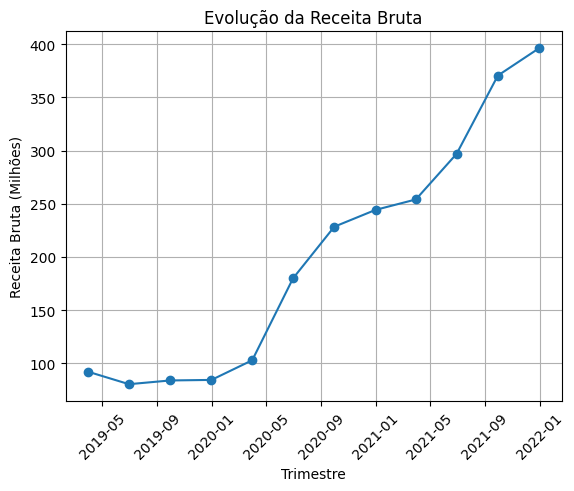

In [70]:
# Converter a coluna 'Trimestre' para o tipo datetime
df_receita_bruta['Trimestre'] = pd.to_datetime(df_receita_bruta['Trimestre'], format='%d/%m/%Y')

#Organizando o gráfico de linhas
plt.plot(df_receita_bruta['Trimestre'], df_receita_bruta['Receita Bruta'], marker='o')
plt.xlabel('Trimestre')
plt.ylabel('Receita Bruta (Milhões)')
plt.title('Evolução da Receita Bruta')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

###Analise de Correlações entre as SUB-KPI's definidas

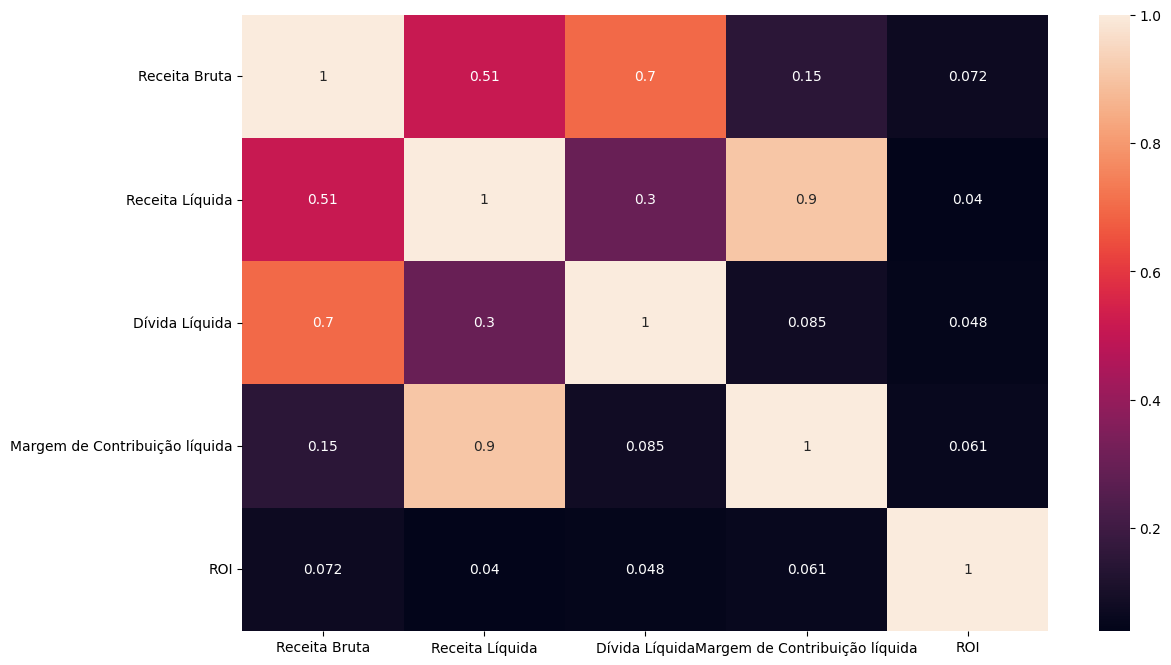

In [71]:
#Analise de Correlações entre as KPI's definidas

import seaborn as sns

plt.rcParams["figure.figsize"] = (13,8)
ax = sns.heatmap(df_receita_bruta.corr(), annot=True)

In [72]:
'''
Existe correlação entre a Margem de Contribuição Líquida e a Receita Líquida;
Existe correlação entre a Dívida Líquida e a Receita Bruta;
Existe correlação entre a Dívida Líquida e a Receita Líquida;
'''

'\nExiste correlação entre a Margem de Contribuição Líquida e a Receita Líquida;\nExiste correlação entre a Dívida Líquida e a Receita Bruta;\nExiste correlação entre a Dívida Líquida e a Receita Líquida;\n'

In [73]:
!pip install pygwalker -q
import pygwalker as pyg

In [74]:
pyg.walk(df_receita_bruta)

#x-Trimestre | Y- Todas as variaveis

Box(children=(HTML(value='<div id="ifr-pyg-0" style="height: auto">\n    <head>\n        <meta http-equiv="Con…

# Analise de Dados BALANÇO PATRIMONIAL

##Extração

In [75]:
# Permite Acesso a sua GCP
serviceAccount = '/content/projeto-taurus-d40d4228e598.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [76]:
# Configurações Google Cloud Storage - ACESSO AO BUCKET
client = storage.Client()
bucket = client.get_bucket('taurus_armas')                                       # nome da bucket
bucket.blob('taurus_armas/Taurus_csv/Taurus_csv_balanco_transposto - Copia.csv') # nome do arquivo
path = 'gs://taurus_armas/Taurus_csv/Taurus_csv_bruto/Taurus_csv_balanco_transposto - Copia.csv'  # gsutil

In [77]:
# Abertura da base de dados e cópia de segurança (bucket)
df = pd.read_csv(path,
                 sep=',',
                 encoding='UTF-8',
                 dayfirst = True)
dfback = df.copy()

## Transformação

In [ ]:
# Visualização do dataframe
df

In [79]:
# Visualização dos dados começando pelo cabeçalho
df.head()


,Trimestre,Ativo Total,Ativo Circulante,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Contas a Receber,Estoques,Ativos Biológicos,Tributos a Recuperar,Despesas Antecipadas,...,Patrimônio Líquido,Capital Social Realizado,Reservas de Capital,Reservas de Reavaliação,Reservas de Lucros,Lucros/Prejuízos Acumulados,Ajustes de Avaliação Patrimonial,Ajustes Acumulados de Conversão,Outros Resultados Abrangentes,Adiantamento para Futuro Aumento Capital.1
0,31/03/23,2233353.0,1405765.0,164490.0,170314.0,276144.0,636097,0.0,35035,30725.0,...,1047748.0,367936,-19445,0.0,464256.0,35536.0,44395.0,0.0,155070.0,0.0
1,31/12/22,2276173.0,1467612.0,201219.0,105544.0,352437.0,630390,0.0,37039,41946.0,...,1024231.0,367936,-21355,0.0,464256.0,0.0,44535.0,0.0,168859.0,0.0
2,30/09/22,2340902.0,1571080.0,111501.0,231626.0,428357.0,677166,0.0,26159,8731.0,...,1083619.0,366256,-21573,0.0,133555.0,373585.0,44688.0,0.0,187108.0,0.0
3,30/06/22,2158506.0,1447454.0,166754.0,96491.0,409990.0,614873,0.0,57449,13988.0,...,926833.0,330730,-23526,0.0,133477.0,270345.0,44867.0,0.0,170940.0,0.0
4,31/03/22,2083732.0,1441760.0,237708.0,99419.0,409422.0,517891,0.0,67829,18833.0,...,885921.0,313226,-26521,0.0,259293.0,169816.0,45046.0,0.0,125061.0,0.0


In [ ]:
# Verificar o tipo de dado em cada coluna
df.dtypes

In [81]:
# Informações detalhadas do DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 56 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Trimestre                                                       42 non-null     object 
 1   Ativo Total                                                     42 non-null     float64
 2   Ativo Circulante                                                42 non-null     float64
 3   Caixa e Equivalentes de Caixa                                   42 non-null     float64
 4   Aplicações Financeiras                                          42 non-null     float64
 5   Contas a Receber                                                42 non-null     float64
 6   Estoques                                                        42 non-null     int64  
 7   Ativos Biológicos                                      

In [82]:
# Verificando se as colunas são iguais
if (df['Estoques'] == df['Estoques.1']).all():
    print("As colunas são iguais.")
else:
    print("As colunas são diferentes.")

As colunas são diferentes.


In [83]:
# Verificando se as colunas são iguais
if (df['Empréstimos e Financiamentos'] == df['Empréstimos e Financiamentos.1']).all():
    print("As colunas são iguais.")
else:
    print("As colunas são diferentes.")

As colunas são diferentes.


In [84]:
# Verifica se dados são únicos na coluna
df.Provisões.is_unique

True

In [ ]:
# Verificar dados Nulos , ausentes , etc - isna()
df.isna().sum()

In [86]:
# Verificando quais colunas possuem todos os valores iguais a zero
colunas_todos_zeros = df.columns[df.eq(0).all()]

print("Colunas com todos os valores iguais a zero:")
print(colunas_todos_zeros)

# Excluindo as colunas que possuem todos os valores iguais a zero
df = df.drop(columns=colunas_todos_zeros)

Colunas com todos os valores iguais a zero:
Index(['Ativos Biológicos',
       'Aplicações Financeiras Avaliadas ao Custo Amortizado', 'Estoques.1',
       'Ativos Biológicos.1', 'Créditos com Partes Relacionadas', 'Diferido',
       'Passivos com Partes Relacionadas',
       'Adiantamento para Futuro Aumento Capital',
       'Passivos sobre Ativos Não-Correntes a Venda e Descontinuados.1',
       'Participação dos Acionistas Não Controladores',
       'Reservas de Reavaliação',
       'Adiantamento para Futuro Aumento Capital.1'],
      dtype='object')


In [87]:
# Correção de inconsistência
df.replace(['***', '**NI'],pd.NA,inplace=True)
df.replace(pd.NA, np.NaN, inplace=True)        # Transformação de pd.NA para np.NaN

In [88]:
# Transformação dos tipos de dados
df['Tributos a Recuperar'] = df['Tributos a Recuperar'].astype(float)
df['Outros'] = df['Outros'].astype(float)
df['Provisões'] = df['Provisões'].astype(float)
df['Capital Social Realizado'] = df['Capital Social Realizado'].astype(float)
df['Reservas de Capital'] = df['Reservas de Capital'].astype(float)
df['Passivo Circulante'] = df['Passivo Circulante'].astype(float)

In [89]:
# Tipos de dados
df.dtypes

Trimestre                                                        object
Ativo Total                                                     float64
Ativo Circulante                                                float64
Caixa e Equivalentes de Caixa                                   float64
Aplicações Financeiras                                          float64
Contas a Receber                                                float64
Estoques                                                          int64
Tributos a Recuperar                                            float64
Despesas Antecipadas                                            float64
Outros Ativos Circulantes                                       float64
Ativo Realizável a Longo Prazo                                  float64
Aplicações Financeiras Avaliadas a Valor Justo                  float64
Contas a Receber.1                                              float64
Tributos Diferidos                                              

In [90]:
# Retirada de colunas não utilizadas na análise ( colunas removidas)

df.drop(['Caixa e Equivalentes de Caixa',
         'Aplicações Financeiras',
         'Contas a Receber',
         'Tributos a Recuperar',
         'Aplicações Financeiras Avaliadas a Valor Justo',
         'Contas a Receber.1',
         'Tributos Diferidos',
         'Outros Ativos Não Circulantes',
         'Obrigações Sociais e Trabalhistas',
         'Fornecedores',
         'Obrigações Fiscais',
         'Empréstimos e Financiamentos',
         'Dividendos e JCP a Pagar',
         'Outros',
         'Despesas Antecipadas.1',
         'Investimentos',
         'Imobilizado',
         'Capital Social Realizado',
         'Provisões',
         'Passivos sobre Ativos Não-Correntes a Venda e Descontinuados',
         'Passivo Não Circulante',
         'Empréstimos e Financiamentos.1',
         'Passivos com Partes Relacionadas.1',
         'Outros.1',
         'Tributos Diferidos.1',
         'Provisões.1',
         'Lucros e Receitas a Apropriar',
         'Outros Ativos Não Circulantes',
         'Outros Ativos Circulantes',
         'Ativo Realizável a Longo Prazo',
         'Intangível',
         'Reservas de Capital',
         'Outros Resultados Abrangentes',
         'Capital Social Realizado',
         'Ajustes Acumulados de Conversão', ],axis=1,inplace=True)


In [91]:
df.head()

,Trimestre,Ativo Total,Ativo Circulante,Estoques,Despesas Antecipadas,Passivo Total,Passivo Circulante,Patrimônio Líquido,Reservas de Lucros,Lucros/Prejuízos Acumulados,Ajustes de Avaliação Patrimonial
0,31/03/23,2233353.0,1405765.0,636097,30725.0,2233353.0,970303.0,1047748.0,464256.0,35536.0,44395.0
1,31/12/22,2276173.0,1467612.0,630390,41946.0,2276173.0,998666.0,1024231.0,464256.0,0.0,44535.0
2,30/09/22,2340902.0,1571080.0,677166,8731.0,2340902.0,1015503.0,1083619.0,133555.0,373585.0,44688.0
3,30/06/22,2158506.0,1447454.0,614873,13988.0,2158506.0,967014.0,926833.0,133477.0,270345.0,44867.0
4,31/03/22,2083732.0,1441760.0,517891,18833.0,2083732.0,914317.0,885921.0,259293.0,169816.0,45046.0


In [92]:
# Renomear
df.rename(columns={
    'Trimestre': 'data_trimestre',
    'Ativo Total': 'ativo_total',
    'Ativo Circulante': 'ativo_circulante',
    'Despesas Antecipadas': 'despesas_antecipadas',
    'Passivo Total': 'passivo_total',
    'Passivo Circulante': 'passivo_circulante',
    'Patrimônio Líquido': 'patrimonio_liquido',
    'Reservas de Lucros': 'reservas_lucros',
    'Lucros/Prejuízos Acumulados': 'lucros/prejuizos_acumulados',
    'Ajustes de Avaliação Patrimonial': 'ajustes_avaliacao_patrimonial',
}, inplace=True)

In [ ]:
# Tipagem
df.dtypes

In [ ]:
# A coluna 'data_trimestre' está como object
# Visualizando essa coluna
df['data_trimestre']

In [95]:
# Mudando o tipo da coluna 'data_trimestre' de object para datetime
df['data_trimestre'] = pd.to_datetime(df['data_trimestre'], format='%d/%m/%y')

# Visualizando a alteração
df['data_trimestre']

0    2023-03-31
1    2022-12-31
2    2022-09-30
3    2022-06-30
4    2022-03-31
5    2021-12-31
6    2021-09-30
7    2021-06-30
8    2021-03-31
9    2020-12-31
10   2020-09-30
11   2020-06-30
12   2020-03-31
13   2019-12-31
14   2019-09-30
15   2019-06-30
16   2019-03-31
17   2018-12-31
18   2018-09-30
19   2018-06-30
20   2018-03-31
21   2017-12-31
22   2017-09-30
23   2017-06-30
24   2017-03-31
25   2016-12-31
26   2016-09-30
27   2016-06-30
28   2016-03-31
29   2015-12-31
30   2015-09-30
31   2015-06-30
32   2015-03-31
33   2014-12-31
34   2014-09-30
35   2014-06-30
36   2014-03-31
37   2013-12-31
38   2013-09-30
39   2013-06-30
40   2013-03-31
41   2012-12-31
Name: data_trimestre, dtype: datetime64[ns]

In [96]:
# Vizualizando o df final
df.sample(10)

,data_trimestre,ativo_total,ativo_circulante,Estoques,despesas_antecipadas,passivo_total,passivo_circulante,patrimonio_liquido,reservas_lucros,lucros/prejuizos_acumulados,ajustes_avaliacao_patrimonial
35,2014-06-30,1091119.00,703463.0,216311,12605.0,1091119.00,556890.0,104090.0,0.0,-129506.0,37180.0
24,2017-03-31,896823.00,480414.0,236724,8201.0,896823.00,372736.0,-174949.0,0.0,-674161.0,49343.0
34,2014-09-30,1024463.00,634728.0,209579,10736.0,1024463.00,530354.0,96639.0,0.0,-223735.0,36790.0
9,2020-12-31,1460650.00,930859.0,298343,22222.0,1460650.00,575350.0,42269.0,0.0,-704720.0,45857.0
1,2022-12-31,2276173.00,1467612.0,630390,41946.0,2276173.00,998666.0,1024231.0,464256.0,0.0,44535.0
38,2013-09-30,1343825.00,870365.0,212401,4159.0,1343825.00,724867.0,291810.0,55352.0,0.0,37621.0
23,2017-06-30,934655.00,512805.0,267839,8822.0,934655.00,436541.0,-190216.0,0.0,-699224.0,48952.0
27,2016-06-30,954.99,564.4,275701,31655.0,954.99,898186.0,-80747.0,0.0,-553954.0,30829.0
20,2018-03-31,777460.00,501069.0,177768,8256.0,777460.00,1004654.0,-444808.0,0.0,-952761.0,47925.0
16,2019-03-31,948421.00,645132.0,290823,9245.0,948421.00,506618.0,-359933.0,0.0,-1008550.0,46703.0


##Carregamento

In [97]:


df.to_csv('gs://taurus_armas/Taurus_csv/Taurus_csv_tratado/balanco_transposto.csv', index=False)

#df.to_csv('gs://projeto-fundamentosdepython/Projetos/Tratado/Airbnb/airbnb_Tratado.csv', index=False) # salva no bucket


In [98]:
# Formatando a coluna 'data_trimestre' no formato "DD-MM-AAAA"
df['data_trimestre'] = df['data_trimestre'].dt.strftime('%d-%m-%Y')


##Convertendo em Pysparck

In [99]:
'''
Criando O dataframe PySpark a partir de um dataframe pandas inicial do balanço patrimonial
'''
df_balanco_py = spark.createDataFrame(df)

In [100]:
df_balanco_py.printSchema()

root
 |-- data_trimestre: string (nullable = true)
 |-- ativo_total: double (nullable = true)
 |-- ativo_circulante: double (nullable = true)
 |-- Estoques: long (nullable = true)
 |-- despesas_antecipadas: double (nullable = true)
 |-- passivo_total: double (nullable = true)
 |-- passivo_circulante: double (nullable = true)
 |-- patrimonio_liquido: double (nullable = true)
 |-- reservas_lucros: double (nullable = true)
 |-- lucros/prejuizos_acumulados: double (nullable = true)
 |-- ajustes_avaliacao_patrimonial: double (nullable = true)



In [101]:
# Criando a versão sem o trimestre para tratamento descritivo
index_to_drop = 0
df_balanco_py_Atualizado = df_balanco_py.drop(df_balanco_py.columns[index_to_drop])

df_balanco_py_Atualizado.show()

+-----------+----------------+--------+--------------------+-------------+------------------+------------------+---------------+---------------------------+-----------------------------+
|ativo_total|ativo_circulante|Estoques|despesas_antecipadas|passivo_total|passivo_circulante|patrimonio_liquido|reservas_lucros|lucros/prejuizos_acumulados|ajustes_avaliacao_patrimonial|
+-----------+----------------+--------+--------------------+-------------+------------------+------------------+---------------+---------------------------+-----------------------------+
|  2233353.0|       1405765.0|  636097|             30725.0|    2233353.0|          970303.0|         1047748.0|       464256.0|                    35536.0|                      44395.0|
|  2276173.0|       1467612.0|  630390|             41946.0|    2276173.0|          998666.0|         1024231.0|       464256.0|                        0.0|                      44535.0|
|  2340902.0|       1571080.0|  677166|              8731.0|    2

## Analises

###Analise Descritiva

In [102]:
describe_balanco = df_balanco_py_Atualizado.describe()
describe_balanco.show()

+-------+------------------+------------------+------------------+--------------------+------------------+------------------+------------------+------------------+---------------------------+-----------------------------+
|summary|       ativo_total|  ativo_circulante|          Estoques|despesas_antecipadas|     passivo_total|passivo_circulante|patrimonio_liquido|   reservas_lucros|lucros/prejuizos_acumulados|ajustes_avaliacao_patrimonial|
+-------+------------------+------------------+------------------+--------------------+------------------+------------------+------------------+------------------+---------------------------+-----------------------------+
|  count|                42|                42|                42|                  42|                42|                42|                42|                42|                         42|                           42|
|   mean|1238635.1902380954| 790953.8666666666|316400.11904761905|  12906.919047619047|1238635.1902380954| 70842

In [103]:
# convertendo desvio padrão em linha

sd = list(describe_balanco.collect()[2])
print(sd)

sd.remove('stddev')
print(sd)
#list(...) converte o objeto Row em uma lista de valores.

['stddev', '491394.0103061722', '346202.39996129624', '136167.1654313903', '9069.747254505162', '491394.0103061722', '198023.74469774254', '450662.48807833437', '114269.57510044349', '434834.38721011346', '8841.417826670198']
['491394.0103061722', '346202.39996129624', '136167.1654313903', '9069.747254505162', '491394.0103061722', '198023.74469774254', '450662.48807833437', '114269.57510044349', '434834.38721011346', '8841.417826670198']


In [104]:
#Variância

# Gerar a nova lista 'var' com valores elevados ao quadrado
var = [float(value) ** 2 for value in sd]

# Imprimir a nova lista 'var'
print(sd)
print(var)

['491394.0103061722', '346202.39996129624', '136167.1654313903', '9069.747254505162', '491394.0103061722', '198023.74469774254', '450662.48807833437', '114269.57510044349', '434834.38721011346', '8841.417826670198']
[241468073364.78247, 119856101738.96133, 18541496941.619617, 82260315.26060393, 241468073364.78247, 39213403464.116714, 203096678160.95486, 13057535793.635895, 189080944300.3949, 78170669.18576157]


In [105]:
#Insiro o valor do summary para identificação e bater o número de linhas da describe
var.insert(0, 'Variância')

df_var = spark.createDataFrame([var])
df_var.show()

+---------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+
|       _1|                  _2|                  _3|                  _4|                 _5|                  _6|                  _7|                  _8|                  _9|                 _10|                _11|
+---------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+
|Variância|2.414680733647824...|1.198561017389613...|1.854149694161961...|8.226031526060393E7|2.414680733647824...|3.921340346411671...|2.030966781609548...|1.305753579363589...|1.890809443003949E11|7.817066918576157E7|
+---------+--------------------+--------------------+--------------------+-------------------+--------------------+-----

In [106]:
#Adicionando o dataframe Variância ao describe_dre
describe_balanco = describe_balanco.union(df_var)
describe_balanco.show()

+---------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------------------+-----------------------------+
|  summary|         ativo_total|    ativo_circulante|            Estoques|despesas_antecipadas|       passivo_total|  passivo_circulante|  patrimonio_liquido|     reservas_lucros|lucros/prejuizos_acumulados|ajustes_avaliacao_patrimonial|
+---------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------------------+-----------------------------+
|    count|                  42|                  42|                  42|                  42|                  42|                  42|                  42|                  42|                         42|                           42|
|     mean|  1238635.1902380954|   790953.866666

In [107]:
moda = [df_balanco_py.groupby(i).count().orderBy("count", ascending=False).first()[0] for i in df_balanco_py.columns]

print(moda)
moda.insert(0, 'Moda')
moda.pop(1)

df_moda = spark.createDataFrame([moda])
df_moda.show()

['30-06-2014', 2158506.0, 616217.0, 211885, 2915.0, 1643997.0, 521497.0, 204813.0, 0.0, 0.0, 32345.0]
+----+---------+--------+------+------+---------+--------+--------+---+---+-------+
|  _1|       _2|      _3|    _4|    _5|       _6|      _7|      _8| _9|_10|    _11|
+----+---------+--------+------+------+---------+--------+--------+---+---+-------+
|Moda|2158506.0|616217.0|211885|2915.0|1643997.0|521497.0|204813.0|0.0|0.0|32345.0|
+----+---------+--------+------+------+---------+--------+--------+---+---+-------+



In [108]:
#Adicionando o dataframe Moda  ao describe_dre
describe_balanco = describe_balanco.union(df_moda)
describe_balanco.show()

+---------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------------------+-----------------------------+
|  summary|         ativo_total|    ativo_circulante|            Estoques|despesas_antecipadas|       passivo_total|  passivo_circulante|  patrimonio_liquido|     reservas_lucros|lucros/prejuizos_acumulados|ajustes_avaliacao_patrimonial|
+---------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------------------+-----------------------------+
|    count|                  42|                  42|                  42|                  42|                  42|                  42|                  42|                  42|                         42|                           42|
|     mean|  1238635.1902380954|   790953.866666

In [109]:
df_balanco_py_Atualizado.printSchema()

root
 |-- ativo_total: double (nullable = true)
 |-- ativo_circulante: double (nullable = true)
 |-- Estoques: long (nullable = true)
 |-- despesas_antecipadas: double (nullable = true)
 |-- passivo_total: double (nullable = true)
 |-- passivo_circulante: double (nullable = true)
 |-- patrimonio_liquido: double (nullable = true)
 |-- reservas_lucros: double (nullable = true)
 |-- lucros/prejuizos_acumulados: double (nullable = true)
 |-- ajustes_avaliacao_patrimonial: double (nullable = true)



In [110]:
from IPython.utils.path import link_or_copy
#0 - 9
quartis = df_balanco_py_Atualizado.approxQuantile(['ativo_total', 'ativo_circulante', 'Estoques', 'despesas_antecipadas', 'passivo_total', 'passivo_circulante', 'patrimonio_liquido', 'reservas_lucros', 'lucros/prejuizos_acumulados', 'ajustes_avaliacao_patrimonial'], [0.25,0.5,0.75], 0)


In [111]:
#criei uma lista q1 e adicionei o quartis[lista0],[index0]

q1 = [quartis[0][0], quartis[1][0], quartis[2][0], quartis[3][0], quartis[4][0], quartis[5][0], quartis[6][0], quartis[7][0], quartis[8][0], quartis[9][0]]
mediana = [quartis[0][1], quartis[1][1], quartis[2][1], quartis[3][1], quartis[4][1], quartis[5][1], quartis[6][1], quartis[7][1], quartis[8][1], quartis[9][1]]
q3 = [quartis[0][2], quartis[1][2], quartis[2][2], quartis[3][2], quartis[4][2], quartis[5][2], quartis[6][2], quartis[7][2], quartis[8][2], quartis[9][2]]

print('Q1:', q1)
print('Mediana: ', mediana)
print('Q3: ', q3)

Q1: [934655.0, 574283.0, 221861.0, 6743.0, 934655.0, 560708.0, -304621.0, 0.0, -952761.0, 37180.0]
Mediana:  [1066440.0, 695925.0, 267915.0, 9086.0, 1066440.0, 679214.0, -57077.0, 0.0, -566155.0, 44867.0]
Q3:  [1343825.0, 870870.0, 326156.0, 15628.0, 1343825.0, 898186.0, 291810.0, 0.0, -30814.0, 46440.0]


In [112]:
#MINIMO E MAXIMO passivo_total

min = describe_balanco.collect()[3]

minimo = [float(min['ativo_total']),float(min['ativo_circulante']),float(min['Estoques']),float(min['despesas_antecipadas']),float(min['passivo_total']),float(min['passivo_circulante']),float(min['patrimonio_liquido']),float(min['reservas_lucros']),float(min['lucros/prejuizos_acumulados']),float(min['ajustes_avaliacao_patrimonial'])]

max = describe_balanco.collect()[4]

maximo = [float(max['ativo_total']),float(max['ativo_circulante']),float(max['Estoques']),float(max['despesas_antecipadas']),float(max['passivo_total']),float(max['passivo_circulante']),float(max['patrimonio_liquido']),float(max['reservas_lucros']),float(max['lucros/prejuizos_acumulados']),float(max['ajustes_avaliacao_patrimonial'])]


In [113]:
#LI E LS
at = []
aiq = []
li = []
ls = []
for i in range(len(minimo)):
  at.append(maximo[i]-minimo[i])
  aiq.append(q3[i]-q1[i])
  li.append(q1[i]-1.5*aiq[i])
  ls.append(q3[i]+1.5*aiq[i])
print('Q1:', q1)
print('Mediana: ', mediana)
print('Q3: ', q3)
print('Amplitude: ', at)
print('Amplitude Interquartílica: ', aiq)
print('Limite inferior: ', li)
print('Limite superior: ', ls)

Q1: [934655.0, 574283.0, 221861.0, 6743.0, 934655.0, 560708.0, -304621.0, 0.0, -952761.0, 37180.0]
Mediana:  [1066440.0, 695925.0, 267915.0, 9086.0, 1066440.0, 679214.0, -57077.0, 0.0, -566155.0, 44867.0]
Q3:  [1343825.0, 870870.0, 326156.0, 15628.0, 1343825.0, 898186.0, 291810.0, 0.0, -30814.0, 46440.0]
Amplitude:  [2339947.01, 1570515.6, 499398.0, 41940.4, 2339947.01, 747065.0, 1593746.0, 464256.0, 1499739.0, 49687.76]
Amplitude Interquartílica:  [409170.0, 296587.0, 104295.0, 8885.0, 409170.0, 337478.0, 596431.0, 0.0, 921947.0, 9260.0]
Limite inferior:  [320900.0, 129402.5, 65418.5, -6584.5, 320900.0, 54491.0, -1199267.5, 0.0, -2335681.5, 23290.0]
Limite superior:  [1957580.0, 1315750.5, 482598.5, 28955.5, 1957580.0, 1404403.0, 1186456.5, 0.0, 1352106.5, 60330.0]


In [114]:
#Insiro o valor do summary para identificação e bater o número de linhas da describe
q1.insert(0,'25%')
mediana.insert(0,'Mediana')
q3.insert(0, '75%')
at.insert(0, 'Amplitude')
aiq.insert(0, 'AIQ')
li.insert(0, 'LI')
ls.insert(0, 'LS')

In [115]:
#nome da variavel = função de criação da dataframe ([lista], ['nome coluna', "nome coluna"])
df_q1 = spark.createDataFrame([q1])
df_q1.show()
df_mediana = spark.createDataFrame([mediana])
df_mediana.show()
df_q3 = spark.createDataFrame([q3])
df_q3.show()
df_at = spark.createDataFrame([at])
df_at.show()
df_aiq = spark.createDataFrame([aiq])
df_aiq.show()
df_li = spark.createDataFrame([li])
df_li.show()
df_ls = spark.createDataFrame([ls])
df_ls.show()

+---+--------+--------+--------+------+--------+--------+---------+---+---------+-------+
| _1|      _2|      _3|      _4|    _5|      _6|      _7|       _8| _9|      _10|    _11|
+---+--------+--------+--------+------+--------+--------+---------+---+---------+-------+
|25%|934655.0|574283.0|221861.0|6743.0|934655.0|560708.0|-304621.0|0.0|-952761.0|37180.0|
+---+--------+--------+--------+------+--------+--------+---------+---+---------+-------+

+-------+---------+--------+--------+------+---------+--------+--------+---+---------+-------+
|     _1|       _2|      _3|      _4|    _5|       _6|      _7|      _8| _9|      _10|    _11|
+-------+---------+--------+--------+------+---------+--------+--------+---+---------+-------+
|Mediana|1066440.0|695925.0|267915.0|9086.0|1066440.0|679214.0|-57077.0|0.0|-566155.0|44867.0|
+-------+---------+--------+--------+------+---------+--------+--------+---+---------+-------+

+---+---------+--------+--------+-------+---------+--------+--------+---+

In [116]:
#Union esta adicionando cada dataframe por ordem no describe_dre
describe_balanco = describe_balanco.union(df_q1)
describe_balanco = describe_balanco.union(df_mediana)
describe_balanco = describe_balanco.union(df_q3)
describe_balanco = describe_balanco.union(df_at)
describe_balanco = describe_balanco.union(df_aiq)
describe_balanco = describe_balanco.union(df_li)
describe_balanco = describe_balanco.union(df_ls)
describe_balanco.show()

+---------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------------------+-----------------------------+
|  summary|         ativo_total|    ativo_circulante|            Estoques|despesas_antecipadas|       passivo_total|  passivo_circulante|  patrimonio_liquido|     reservas_lucros|lucros/prejuizos_acumulados|ajustes_avaliacao_patrimonial|
+---------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+---------------------------+-----------------------------+
|    count|                  42|                  42|                  42|                  42|                  42|                  42|                  42|                  42|                         42|                           42|
|     mean|  1238635.1902380954|   790953.866666

###Analise da KPI'S (BALANÇO PATRIMONIAL)

1 - Ativo total da empresa;

2 - Endividamento/divida liquida;

3 - Patrimonio liquido;

4 - Reserva de lucros;

**Houve necessidade de tratamento apenas nas seguintes sub-categorias:**

**1. Liquidez Corrente**

**2. EBITDA**

**3. Taxa de Endividamento**


### Liquidez Corrente

In [117]:
df_balanco_py.show()

+--------------+-----------+----------------+--------+--------------------+-------------+------------------+------------------+---------------+---------------------------+-----------------------------+
|data_trimestre|ativo_total|ativo_circulante|Estoques|despesas_antecipadas|passivo_total|passivo_circulante|patrimonio_liquido|reservas_lucros|lucros/prejuizos_acumulados|ajustes_avaliacao_patrimonial|
+--------------+-----------+----------------+--------+--------------------+-------------+------------------+------------------+---------------+---------------------------+-----------------------------+
|    31-03-2023|  2233353.0|       1405765.0|  636097|             30725.0|    2233353.0|          970303.0|         1047748.0|       464256.0|                    35536.0|                      44395.0|
|    31-12-2022|  2276173.0|       1467612.0|  630390|             41946.0|    2276173.0|          998666.0|         1024231.0|       464256.0|                        0.0|                     

In [118]:

rows = df_balanco_py.collect()

# Acessando os valores necessarios para calculo da Liquidez Corrente
print('-----------2021---------')
# 4° Trimestre 2021
valor_trimestre = rows[1].__getitem__(2)
valor_resultadobruto= rows[1].__getitem__(6)
tri21_4 = [valor_trimestre, valor_resultadobruto]
print(tri21_4)

# 3° Trimestre 2021
valor_trimestre = rows[2].__getitem__(2)
valor_resultadobruto = rows[2].__getitem__(6)
tri21_3 = [valor_trimestre, valor_resultadobruto]
print(tri21_3)

# 2° Trimestre 2021
valor_trimestre = rows[3].__getitem__(2)
valor_resultadobruto = rows[3].__getitem__(6)
tri21_2 = [valor_trimestre, valor_resultadobruto]
print(tri21_2)

# 1° Trimestre 2021
valor_trimestre = rows[4].__getitem__(2)
valor_resultadobruto = rows[4].__getitem__(6)
tri21_1 = [valor_trimestre, valor_resultadobruto]
print(tri21_1)

print('-----------2020---------')

# 4° Trimestre 2020
valor_trimestre = rows[5].__getitem__(2)
valor_resultadobruto = rows[5].__getitem__(6)
tri20_4 = [valor_trimestre, valor_resultadobruto]
print(tri20_4)

# 3° Trimestre 2020
valor_trimestre = rows[6].__getitem__(2)
valor_resultadobruto = rows[6].__getitem__(6)
tri20_3 = [valor_trimestre, valor_resultadobruto]
print(tri20_3)

# 2° Trimestre 2020
valor_trimestre = rows[7].__getitem__(2)
valor_resultadobruto = rows[7].__getitem__(6)
tri20_2 = [valor_trimestre, valor_resultadobruto]
print(tri20_2)

# 1° Trimestre 2020
valor_trimestre = rows[8].__getitem__(2)
valor_resultadobruto = rows[8].__getitem__(6)
tri20_1 = [valor_trimestre, valor_resultadobruto]
print(tri20_1)

print('-----------2019---------')

# 4° Trimestre 2019
valor_trimestre = rows[9].__getitem__(2)
valor_resultadobruto = rows[9].__getitem__(6)
tri19_4 = [valor_trimestre, valor_resultadobruto]
print(tri19_4)

# 3° Trimestre 2019
valor_trimestre = rows[10].__getitem__(2)
valor_resultadobruto = rows[10].__getitem__(6)
tri19_3 = [valor_trimestre, valor_resultadobruto]
print(tri19_3)

# 2° Trimestre 2019
valor_trimestre = rows[11].__getitem__(2)
valor_resultadobruto = rows[11].__getitem__(6)
tri19_2 = [valor_trimestre, valor_resultadobruto]
print(tri19_2)

# 1° Trimestre 2019
valor_trimestre = rows[12].__getitem__(2)
valor_resultadobruto = rows[12].__getitem__(6)
tri19_1 = [valor_trimestre, valor_resultadobruto]
print(tri19_1)

-----------2021---------
[1467612.0, 998666.0]
[1571080.0, 1015503.0]
[1447454.0, 967014.0]
[1441760.0, 914317.0]
-----------2020---------
[1455990.0, 1119801.0]
[1268668.0, 623860.0]
[1080493.0, 581227.0]
[1111511.0, 698828.0]
-----------2019---------
[930859.0, 575350.0]
[870870.0, 594202.0]
[817598.0, 700923.0]
[772506.0, 713024.0]


In [119]:
# Liquidez Corrente = Ativos Circulantes / Passivos Circulantes


print('---------------2021--------------')
liq_corrente_4_21 = (1467612.0 / 998666.0)
print('A Líquidez Corrente do 4° Trimestre de 2021 foi:',abs(round(liq_corrente_4_21, 2)))

liq_corrente_3_21 = (1571080.0 / 1015503.0)
print('A Líquidez Corrente do 3° Trimestre de 2021 foi:',abs(round(liq_corrente_3_21, 2)))

liq_corrente_2_21 = (1447454.0 / 967014.0)
print('A Líquidez Corrente do 2° Trimestre de 2021 foi:',abs(round(liq_corrente_2_21, 2)))

liq_corrente_1_21 = (1441760.0 / 914317.0)
print('A Líquidez Corrente do 1° Trimestre de 2021 foi:',abs(round(liq_corrente_1_21, 2)))

print('---------------2020--------------')
liq_corrente_4_20 = (1455990.0 / 1119801.0)
print('A Líquidez Corrente do 4° Trimestre de 2020 foi:',abs(round(liq_corrente_4_20, 2)))

liq_corrente_3_20 = (1268668.0 / 623860.0)
print('A Líquidez Corrente do 3° Trimestre de 2020 foi:',abs(round(liq_corrente_3_20, 2)))

liq_corrente_2_20 = (1080493.0 / 581227.0)
print('A Líquidez Corrente do 2° Trimestre de 2020 foi:',abs(round(liq_corrente_2_20, 2)))

liq_corrente_1_20 = (1111511.0 / 698828.0)
print('A Líquidez Corrente do 1° Trimestre de 2020 foi:',abs(round(liq_corrente_1_20, 2)))

print('---------------2019--------------')
liq_corrente_4_19 = (930859.0 / 575350.0)
print('A Líquidez Corrente do 4° Trimestre de 2019 foi:',abs(round(liq_corrente_4_19, 2)))

liq_corrente_3_19 = (870870.0 / 594202.0)
print('A Líquidez Corrente do 3° Trimestre de 2019 foi:',abs(round(liq_corrente_3_19, 2)))

liq_corrente_2_19 = (817598.0 / 700923.0)
print('A Líquidez Corrente do 2° Trimestre de 2019 foi:',abs(round(liq_corrente_2_19, 2)))

liq_corrente_1_19 = (772506.0 / 713024.0)
print('A Líquidez Corrente do 1° Trimestre de 2019 foi:',abs(round(liq_corrente_1_19, 2)))

---------------2021--------------
A Líquidez Corrente do 4° Trimestre de 2021 foi: 1.47
A Líquidez Corrente do 3° Trimestre de 2021 foi: 1.55
A Líquidez Corrente do 2° Trimestre de 2021 foi: 1.5
A Líquidez Corrente do 1° Trimestre de 2021 foi: 1.58
---------------2020--------------
A Líquidez Corrente do 4° Trimestre de 2020 foi: 1.3
A Líquidez Corrente do 3° Trimestre de 2020 foi: 2.03
A Líquidez Corrente do 2° Trimestre de 2020 foi: 1.86
A Líquidez Corrente do 1° Trimestre de 2020 foi: 1.59
---------------2019--------------
A Líquidez Corrente do 4° Trimestre de 2019 foi: 1.62
A Líquidez Corrente do 3° Trimestre de 2019 foi: 1.47
A Líquidez Corrente do 2° Trimestre de 2019 foi: 1.17
A Líquidez Corrente do 1° Trimestre de 2019 foi: 1.08


### EBITDA

In [120]:
df_balanco_py.show()

+--------------+-----------+----------------+--------+--------------------+-------------+------------------+------------------+---------------+---------------------------+-----------------------------+
|data_trimestre|ativo_total|ativo_circulante|Estoques|despesas_antecipadas|passivo_total|passivo_circulante|patrimonio_liquido|reservas_lucros|lucros/prejuizos_acumulados|ajustes_avaliacao_patrimonial|
+--------------+-----------+----------------+--------+--------------------+-------------+------------------+------------------+---------------+---------------------------+-----------------------------+
|    31-03-2023|  2233353.0|       1405765.0|  636097|             30725.0|    2233353.0|          970303.0|         1047748.0|       464256.0|                    35536.0|                      44395.0|
|    31-12-2022|  2276173.0|       1467612.0|  630390|             41946.0|    2276173.0|          998666.0|         1024231.0|       464256.0|                        0.0|                     

In [140]:
# EBITDA =  Ativo Circulante + Ajustes de Avaliação Patrimonial + Despesas Antecipadas
#reservas de lucros
# Acessando os valores necessarios para calculo da EBTIDA
rows = df_balanco_py.collect()

print('--------------2021------------')
# 4° Trimestre 2021
valor_trimestre = rows[5].__getitem__(2)
valor_resultadobruto= rows[5].__getitem__(10)
valor_despesasant = rows[5].__getitem__(4)
tri21_4 = [valor_trimestre, valor_resultadobruto, valor_despesasant]
print(tri21_4)

# 3° Trimestre 2021
valor_trimestre = rows[6].__getitem__(2)
valor_resultadobruto = rows[6].__getitem__(10)
valor_despesasant = rows[6].__getitem__(4)
tri21_3 = [valor_trimestre, valor_resultadobruto, valor_despesasant]
print(tri21_3)

# 2° Trimestre 2021
valor_trimestre = rows[7].__getitem__(2)
valor_resultadobruto = rows[7].__getitem__(10)
valor_despesasant = rows[7].__getitem__(4)
tri21_2 = [valor_trimestre, valor_resultadobruto, valor_despesasant]
print(tri21_2)

# 1° Trimestre 2021
valor_trimestre = rows[8].__getitem__(2)
valor_resultadobruto = rows[8].__getitem__(10)
valor_despesasant = rows[8].__getitem__(4)
tri21_1 = [valor_trimestre, valor_resultadobruto, valor_despesasant]
print(tri21_1)

print('--------------2020------------')

# 4° Trimestre 2020
valor_trimestre = rows[9].__getitem__(2)
valor_resultadobruto = rows[9].__getitem__(10)
valor_despesasant = rows[9].__getitem__(4)
tri20_4 = [valor_trimestre, valor_resultadobruto, valor_despesasant]
print(tri20_4)

# 3° Trimestre 2020
valor_trimestre = rows[10].__getitem__(2)
valor_resultadobruto = rows[10].__getitem__(10)
valor_despesasant = rows[10].__getitem__(4)
tri20_3 = [valor_trimestre, valor_resultadobruto, valor_despesasant]
print(tri20_3)

# 2° Trimestre 2020
valor_trimestre = rows[11].__getitem__(2)
valor_resultadobruto = rows[11].__getitem__(10)
valor_despesasant = rows[11].__getitem__(4)
tri20_2 = [valor_trimestre, valor_resultadobruto, valor_despesasant]
print(tri20_2)

# 1° Trimestre 2020
valor_trimestre = rows[12].__getitem__(2)
valor_resultadobruto = rows[12].__getitem__(10)
valor_despesasant = rows[12].__getitem__(4)
tri20_1 = [valor_trimestre, valor_resultadobruto, valor_despesasant]
print(tri20_1)

print('--------------2020------------')

# 4° Trimestre 2019
valor_trimestre = rows[13].__getitem__(2)
valor_resultadobruto = rows[13].__getitem__(10)
valor_despesasant = rows[13].__getitem__(4)
tri19_4 = [valor_trimestre, valor_resultadobruto, valor_despesasant]
print(tri19_4)

# 3° Trimestre 2019
valor_trimestre = rows[14].__getitem__(2)
valor_resultadobruto = rows[14].__getitem__(10)
valor_despesasant = rows[14].__getitem__(4)
tri19_3 = [valor_trimestre, valor_resultadobruto, valor_despesasant]
print(tri19_3)

# 2° Trimestre 2019
valor_trimestre = rows[15].__getitem__(2)
valor_resultadobruto = rows[15].__getitem__(10)
valor_despesasant = rows[15].__getitem__(4)
tri19_2 = [valor_trimestre, valor_resultadobruto, valor_despesasant]
print(tri19_2)

# 1° Trimestre 2019
valor_trimestre = rows[16].__getitem__(2)
valor_resultadobruto = rows[16].__getitem__(10)
valor_despesasant = rows[16].__getitem__(4)
tri19_1 = [valor_trimestre, valor_resultadobruto, valor_despesasant]
print(tri19_1)

--------------2021------------
[1455990.0, 45225.0, 30985.0]
[1268668.0, 45380.0, 4434.0]
[1080493.0, 45536.0, 6107.0]
[1111511.0, 45693.0, 17309.0]
--------------2020------------
[930859.0, 45857.0, 22222.0]
[870870.0, 46086.0, 2915.0]
[817598.0, 46325.0, 9582.0]
[772506.0, 46564.0, 10965.0]
--------------2020------------
[694536.0, 45958.0, 6279.0]
[763364.0, 46204.0, 7571.0]
[706128.0, 46440.0, 10895.0]
[645132.0, 46703.0, 9245.0]


In [154]:
# EBITDA =  Ativo Circulante + Ajustes de Avaliação Patrimonial + Despesas Antecipadas

print('---------------2021--------------')
ebtida_4_21 = ((1455990.0 + 44535.0 + 41946.0 ) / 901.319)
print('A EBTIDA do 4° Trimestre de 2021 foi:',abs(round(ebtida_4_21, 2)))

ebtida_3_21 = ((1268668.0 + 44688.0 + 8731.0) / 794.157)
print('A EBTIDA do 3° Trimestre de 2021 foi:',abs(round(ebtida_3_21, 2)))

ebtida_2_21 = ((1080493.0 + 44867.0 + 13988.0) / 701.958)
print('A EBTIDA do 2° Trimestre de 2021 foi:',abs(round(ebtida_2_21, 2)))

ebtida_1_21 = ((1111511.0 + 45046.0 + 18833.0) / 598.0)
print('A EBTIDA do 1° Trimestre de 2021 foi:',abs(round(ebtida_1_21, 2)))

print('---------------2020--------------')
ebtida_4_20 = ((930859.0 + 45225.0 + 1119801.0) / 1069.888)
print('A EBTIDA do 4° Trimestre de 2020 foi:',abs(round(ebtida_4_20, 2)))

ebtida_3_20 = ((870870.0 + 45380.0 + 4434.0) / 1274.0)
print('A EBTIDA do 3° Trimestre de 2020 foi:',abs(round(ebtida_3_20, 2)))

ebtida_2_20 = ((817598.0 + 45536.0 + 6107.0) / 1134.409)
print('A EBTIDA do 2° Trimestre de 2020 foi:',abs(round(ebtida_2_20, 2)))

ebtida_1_20 = ((772506.0 + 45693.0 + 17309.0) / 330.096)
print('A EBTIDA do 1° Trimestre de 2020 foi:',abs(round(ebtida_1_20, 2)))

print('---------------2019--------------')
ebtida_4_19 = ((694536.0 + 45857.0 + 22222.0) / 311.78)
print('A EBTIDA do 4° Trimestre de 2019 foi:',abs(round(ebtida_4_19, 2)))

ebtida_3_19 = ((763364.0 + 46086.0 + 2915.0) / 278.143)
print('A EBTIDA do 3° Trimestre de 2019 foi:',abs(round(ebtida_3_19, 2)))

ebtida_2_19 = ((706128.0 + 46325.0 + 9582.0) / 270.3)
print('A EBTIDA do 2° Trimestre de 2019 foi:',abs(round(ebtida_2_19, 2)))

ebtida_1_19 = ((645132.0 + 46564.0 + 10965.0) / 921.99)
print('A EBTIDA do 1° Trimestre de 2019 foi:',abs(round(ebtida_1_19, 2)))


---------------2021--------------
A EBTIDA do 4° Trimestre de 2021 foi: 1711.35
A EBTIDA do 3° Trimestre de 2021 foi: 1664.77
A EBTIDA do 2° Trimestre de 2021 foi: 1623.1
A EBTIDA do 1° Trimestre de 2021 foi: 1965.54
---------------2020--------------
A EBTIDA do 4° Trimestre de 2020 foi: 1958.98
A EBTIDA do 3° Trimestre de 2020 foi: 722.67
A EBTIDA do 2° Trimestre de 2020 foi: 766.25
A EBTIDA do 1° Trimestre de 2020 foi: 2531.11
---------------2019--------------
A EBTIDA do 4° Trimestre de 2019 foi: 2446.0
A EBTIDA do 3° Trimestre de 2019 foi: 2920.67
A EBTIDA do 2° Trimestre de 2019 foi: 2819.22
A EBTIDA do 1° Trimestre de 2019 foi: 762.11


### Taxa de Endividamento

In [123]:
#Taxa de Endividamento = Passivo Circulante / Ativo Circulante
df_balanco_py.show()

+--------------+-----------+----------------+--------+--------------------+-------------+------------------+------------------+---------------+---------------------------+-----------------------------+
|data_trimestre|ativo_total|ativo_circulante|Estoques|despesas_antecipadas|passivo_total|passivo_circulante|patrimonio_liquido|reservas_lucros|lucros/prejuizos_acumulados|ajustes_avaliacao_patrimonial|
+--------------+-----------+----------------+--------+--------------------+-------------+------------------+------------------+---------------+---------------------------+-----------------------------+
|    31-03-2023|  2233353.0|       1405765.0|  636097|             30725.0|    2233353.0|          970303.0|         1047748.0|       464256.0|                    35536.0|                      44395.0|
|    31-12-2022|  2276173.0|       1467612.0|  630390|             41946.0|    2276173.0|          998666.0|         1024231.0|       464256.0|                        0.0|                     

In [124]:
# Acessando os valores necessarios para calculo da Taxa de Endividamento
rows = df_balanco_py.collect()

print('-----------2021---------')
# 4° Trimestre 2021
valor_trimestre = rows[1].__getitem__(4)
valor_resultadobruto= rows[1].__getitem__(2)
tri21_4 = [valor_trimestre, valor_resultadobruto]
print(tri21_4)

# 3° Trimestre 2021
valor_trimestre = rows[2].__getitem__(4)
valor_resultadobruto = rows[2].__getitem__(2)
tri21_3 = [valor_trimestre, valor_resultadobruto]
print(tri21_3)

# 2° Trimestre 2021
valor_trimestre = rows[3].__getitem__(4)
valor_resultadobruto = rows[3].__getitem__(2)
tri21_2 = [valor_trimestre, valor_resultadobruto]
print(tri21_2)

# 1° Trimestre 2021
valor_trimestre = rows[4].__getitem__(4)
valor_resultadobruto = rows[4].__getitem__(2)
tri21_1 = [valor_trimestre, valor_resultadobruto]
print(tri21_1)

print('-----------2020---------')

# 4° Trimestre 2020
valor_trimestre = rows[5].__getitem__(4)
valor_resultadobruto = rows[5].__getitem__(2)
tri20_4 = [valor_trimestre, valor_resultadobruto]
print(tri20_4)

# 3° Trimestre 2020
valor_trimestre = rows[6].__getitem__(4)
valor_resultadobruto = rows[6].__getitem__(2)
tri20_3 = [valor_trimestre, valor_resultadobruto]
print(tri20_3)

# 2° Trimestre 2020
valor_trimestre = rows[7].__getitem__(4)
valor_resultadobruto = rows[7].__getitem__(2)
tri20_2 = [valor_trimestre, valor_resultadobruto]
print(tri20_2)

# 1° Trimestre 2020
valor_trimestre = rows[8].__getitem__(4)
valor_resultadobruto = rows[8].__getitem__(2)
tri20_1 = [valor_trimestre, valor_resultadobruto]
print(tri20_1)

print('-----------2019---------')

# 4° Trimestre 2019
valor_trimestre = rows[9].__getitem__(4)
valor_resultadobruto = rows[9].__getitem__(2)
tri19_4 = [valor_trimestre, valor_resultadobruto]
print(tri19_4)

# 3° Trimestre 2019
valor_trimestre = rows[10].__getitem__(4)
valor_resultadobruto = rows[10].__getitem__(2)
tri19_3 = [valor_trimestre, valor_resultadobruto]
print(tri19_3)

# 2° Trimestre 2019
valor_trimestre = rows[11].__getitem__(4)
valor_resultadobruto = rows[11].__getitem__(2)
tri19_2 = [valor_trimestre, valor_resultadobruto]
print(tri19_2)

# 1° Trimestre 2019
valor_trimestre = rows[12].__getitem__(4)
valor_resultadobruto = rows[12].__getitem__(2)
tri19_1 = [valor_trimestre, valor_resultadobruto]
print(tri19_1)

-----------2021---------
[41946.0, 1467612.0]
[8731.0, 1571080.0]
[13988.0, 1447454.0]
[18833.0, 1441760.0]
-----------2020---------
[30985.0, 1455990.0]
[4434.0, 1268668.0]
[6107.0, 1080493.0]
[17309.0, 1111511.0]
-----------2019---------
[22222.0, 930859.0]
[2915.0, 870870.0]
[9582.0, 817598.0]
[10965.0, 772506.0]


In [125]:
#Taxa de Endividamento = Passivo Circulante / Ativo Circulante

print('---------------2021--------------')
taxa_endiv_4_21 = (998666.0 / 1467612.0)
print('A Taxa de Endividamento do 4° Trimestre de 2021 foi:',abs(round(liq_corrente_4_21, 2)))

taxa_endiv_3_21 = (1015503.0 / 1571080.0)
print('A Taxa de Endividamento do 3° Trimestre de 2021 foi:',abs(round(liq_corrente_3_21, 2)))

taxa_endiv_2_21 = (967014.0 / 1447454.0)
print('A Taxa de Endividamento do 2° Trimestre de 2021 foi:',abs(round(liq_corrente_2_21, 2)))

taxa_endiv_1_21 = (914317.0 / 1441760.0)
print('A Taxa de Endividamento do 1° Trimestre de 2021 foi:',abs(round(liq_corrente_1_21, 2)))

print('---------------2020--------------')
taxa_endiv_4_20 = (1119801.0 / 1455990.0)
print('A Taxa de Endividamento do 4° Trimestre de 2020 foi:',abs(round(liq_corrente_4_20, 2)))

taxa_endiv_3_20 = (623860.0 / 1268668.0)
print('A Taxa de Endividamento do 3° Trimestre de 2020 foi:',abs(round(liq_corrente_3_20, 2)))

taxa_endiv_2_20 = (581227.0 / 1080493.0)
print('A Taxa de Endividamento do 2° Trimestre de 2020 foi:',abs(round(liq_corrente_2_20, 2)))

taxa_endiv_1_20 = (698828.0 / 1111511.0)
print('A Taxa de Endividamento do 1° Trimestre de 2020 foi:',abs(round(liq_corrente_1_20, 2)))

print('---------------2019--------------')
taxa_endiv_4_19 = (575350.0 / 930859.0)
print('A Taxa de Endividamento do 4° Trimestre de 2019 foi:',abs(round(liq_corrente_4_19, 2)))

taxa_endiv_3_19 = (594202.0 / 870870.0)
print('A Taxa de Endividamento do 3° Trimestre de 2019 foi:',abs(round(liq_corrente_3_19, 2)))

taxa_endiv_2_19 = (700923.0 / 817598.0)
print('A Taxa de Endividamento do 2° Trimestre de 2019 foi:',abs(round(liq_corrente_2_19, 2)))

taxa_endiv_1_19 = (713024.0 / 772506.0)
print('A Taxa de Endividamento do 1° Trimestre de 2019 foi:',abs(round(liq_corrente_1_19, 2)))

---------------2021--------------
A Taxa de Endividamento do 4° Trimestre de 2021 foi: 1.47
A Taxa de Endividamento do 3° Trimestre de 2021 foi: 1.55
A Taxa de Endividamento do 2° Trimestre de 2021 foi: 1.5
A Taxa de Endividamento do 1° Trimestre de 2021 foi: 1.58
---------------2020--------------
A Taxa de Endividamento do 4° Trimestre de 2020 foi: 1.3
A Taxa de Endividamento do 3° Trimestre de 2020 foi: 2.03
A Taxa de Endividamento do 2° Trimestre de 2020 foi: 1.86
A Taxa de Endividamento do 1° Trimestre de 2020 foi: 1.59
---------------2019--------------
A Taxa de Endividamento do 4° Trimestre de 2019 foi: 1.62
A Taxa de Endividamento do 3° Trimestre de 2019 foi: 1.47
A Taxa de Endividamento do 2° Trimestre de 2019 foi: 1.17
A Taxa de Endividamento do 1° Trimestre de 2019 foi: 1.08


# Analise de Dados DISTRIBUIDORES

Visualização dos dados dos distribuidores de vendas da TAURUS e exportação das informações recebidas em xlsx para .csv na Bucket

In [126]:
# Permite Acesso a GCP
serviceAccount = '/content/projeto-taurus-d40d4228e598.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [127]:
# Selecionando o arquivo da Bucket
client = storage.Client()
bucket = client.get_bucket('taurus_armas')
bucket.blob('taurus_armas/Taurus_csv/Taurus_lojistas')
# URI da gsutil
path = 'gs://taurus_armas/Taurus_csv/Taurus_lojistas/Distribuidores.csv'

In [128]:
# Abertura da base de dados e cópia de segurança (bucket)
df = pd.read_csv(path,
                 sep=';',
                 encoding='latin1',
                 dayfirst = True)
dfback = df.copy()

In [129]:
df

,Estado,Região,Quantidade
0,Belém (PA),NORTE,1
1,Manaus (AM),NORTE,2
2,Porto Velho (RO),NORTE,1
3,Boa Vista (RR),NORTE,1
4,Macapá (AP),NORTE,1
5,Salvador (BA),NORDESTE,5
6,Recife (PE),NORDESTE,5
7,Fortaleza (CE),NORDESTE,4
8,Aracaju (SE),NORDESTE,2
9,Maceió (AL),NORDESTE,2


In [130]:
df.to_csv('gs://taurus_armas/Taurus_csv/Taurus_lojistas/distribuidores_tratado', index=False)

Faturamento Brasi

In [131]:
# Selecionando o arquivo da Bucket
client = storage.Client()
bucket = client.get_bucket('taurus_armas')
bucket.blob('taurus_armas/Taurus_csv/Taurus_csv_bruto')
# URI da gsutil
path = 'gs://taurus_armas/Taurus_csv/Taurus_csv_bruto/faturamentobrasil_bruto.csv'

In [132]:
# Abertura da base de dados e cópia de segurança (bucket)
df_fatBrasil = pd.read_csv(path,
                 sep=';',
                 encoding='latin1',
                 dayfirst = True)
dfback = df_fatBrasil.copy()

In [133]:
df_fatBrasil

,Período,Geral,Sudeste,Sul,Nordeste,Centro-Oeste,Norte
0,Total 2023,48.940,36.462,5.164,2.441,1.428,3.445
1,1T 2023,48.940,36.462,5.164,2.441,1.428,3.445
2,2T 2023,0,0,0.000,0.000,0.000,0.000
3,3T 2023,0,0,0.000,0.000,0.000,0.000
4,4T 2023,0,0,0.000,0.000,0.000,0.000
5,Total 2022,1.847.621,1.547.413,161.899,45.720,44.353,48.236
6,1T 2022,168.361,139.773,14.685,3.368,3.752,6.783
7,2T 2022,355.750,293.363,35.891,8.377,8.149,9.970
8,3T 2022,563.980,476.859,47.161,14.869,12.364,12.727
9,4T 2022,759.530,637.418,64.162,19.106,20.088,18.756


In [134]:
df_fatBrasil.to_csv('gs://taurus_armas/Taurus_csv/Taurus_csv_tratado/faturamento_Brasil', index=False)
